# Introduction

Online retailers want to group their customers. In this assignment, I will use Clustering methods to group customers of a online retail data set. Then, I will use SVM to predict the Revenue and compare the Revenue with the result of Clustering method.

The data set is sourced from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

The tasks of this assignment are:
1) Using hierarchical clustering algorithm to group the customers of a online retail.
2) Using K-means to group the customers of a online retail.
3) Using 2 SVM methods to predict the Revenue of the online retail.
4) Compare result of SVM and k-means (k = 2) with Actual Labels

- 1. About Dataset
- 2. Data Summary
- 3. Pre-Clustering Exploratory Data Analysis
- 4. Pre-Clustering Data Preparation
- 5. Cluster Modeling
  - hierarchical
  - K-means
- 6. Post-Clustering Exploratory Data Analysis
- 7. Clustering Output vs. Actual Labels
- 8. SVM Modeling
- 9. Select Models
- 10. Clustering + SVM Output vs. Actual Labels 
- 11. Conclustions
- 12. Reference

# 1. About Dataset

Abstract: Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

The dataset consists of 10 numerical and 7 categorical attributes.

0. "Administrative"
1. "Administrative Duration"
2. "Informational"
3. "Informational Duration"
4. "Product Related"
5. "Product Related Duration"

The above 6 variables represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

6. "Bounce Rate": a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
7. "Exit Rate": a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
8. "Page Value": represents the average value for a web page that a user visited before completing an e-commerce transaction

The above 3 represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

9. ""Special Day": indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 

10. month: month of the year
11. operating system
12. browser
13. region
14. traffic type
15. visitor type as returning or new visitor
16. weekend: a boolean value indicating whether the date of the visit is weekend.


Bounce Rate vs Exit Rate https://support.google.com/analytics/answer/2525491?hl=en

For all pageviews to the page, Exit Rate is the percentage that were the last in the session.

For all sessions that start with the page, Bounce Rate is the percentage that were the only one of the session.

Bounce Rate for a page is based only on sessions that start with that page.  

# 2. Data Summary

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

import missingno as msno
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load Data

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/Project2_Data.csv')

# Use head function to make sure the data loaded properly
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [3]:
df.shape

(12330, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Summary
The data set has 12330 rows and 17 variables. It has not nan values.

# 3. Pre-Clustering Exploratory Data Analysis

In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [6]:
num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# nominal categories, Weekend is boolean nominal categories
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

In [7]:
# see the description
df[num_cols].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [8]:
# To check whether there are duplicated rows in the other columns (without the 1st column INDEX) 
dup_rows = df.duplicated( keep='first')

dup_rows.value_counts()

False    12205
True       125
dtype: int64

The data set has duplicates. They need to process in data preparation step

In [9]:
# using histogram and boxplot to see the percentage variables
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(14, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])

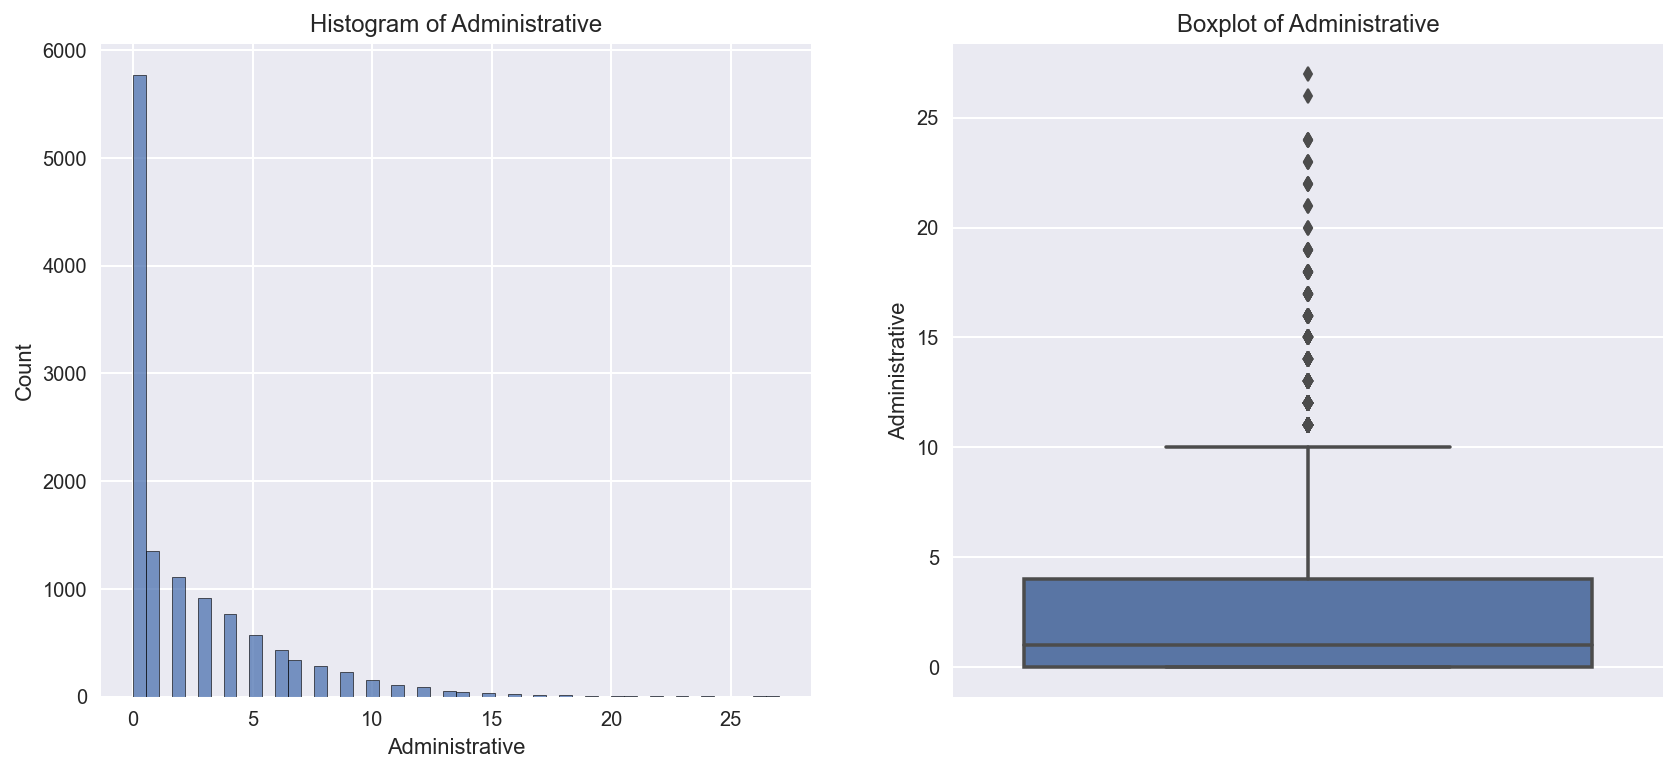

In [10]:
# using histogram and box plot to see the Administrative
hist_box(df, 'Administrative')

The Administrative shows a right skewed distribution and it has outliers.

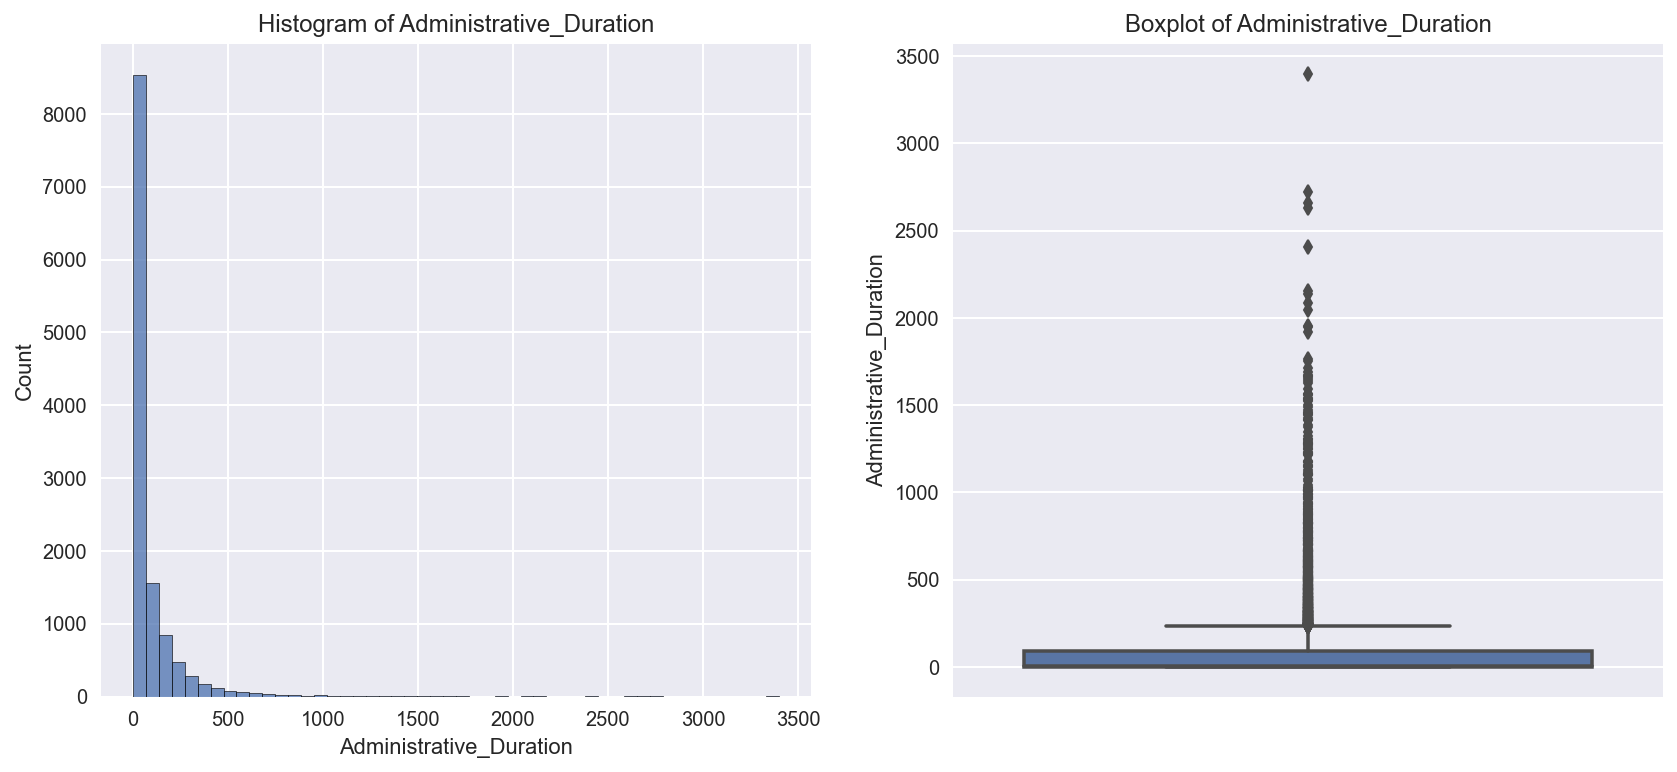

In [11]:
# using histogram and box plot to see the Administrative_Duration
hist_box(df, 'Administrative_Duration')

The Administrative_Duration shows a right skewed distribution and it has outliers.

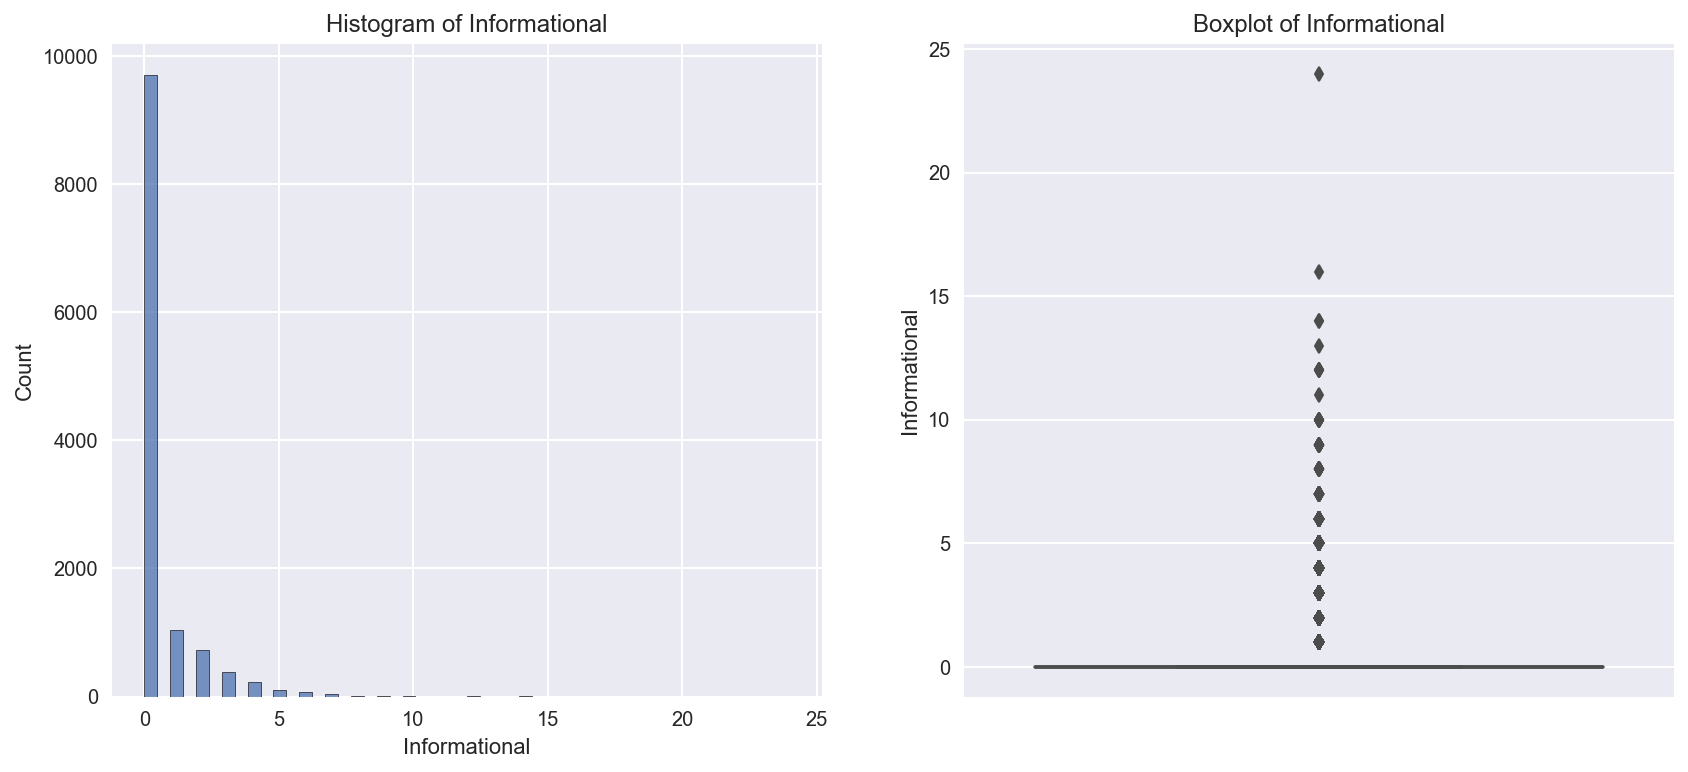

In [12]:
# using histogram and box plot to see the Informational
hist_box(df, 'Informational')

The Informational shows a right skewed distribution and it has outliers.

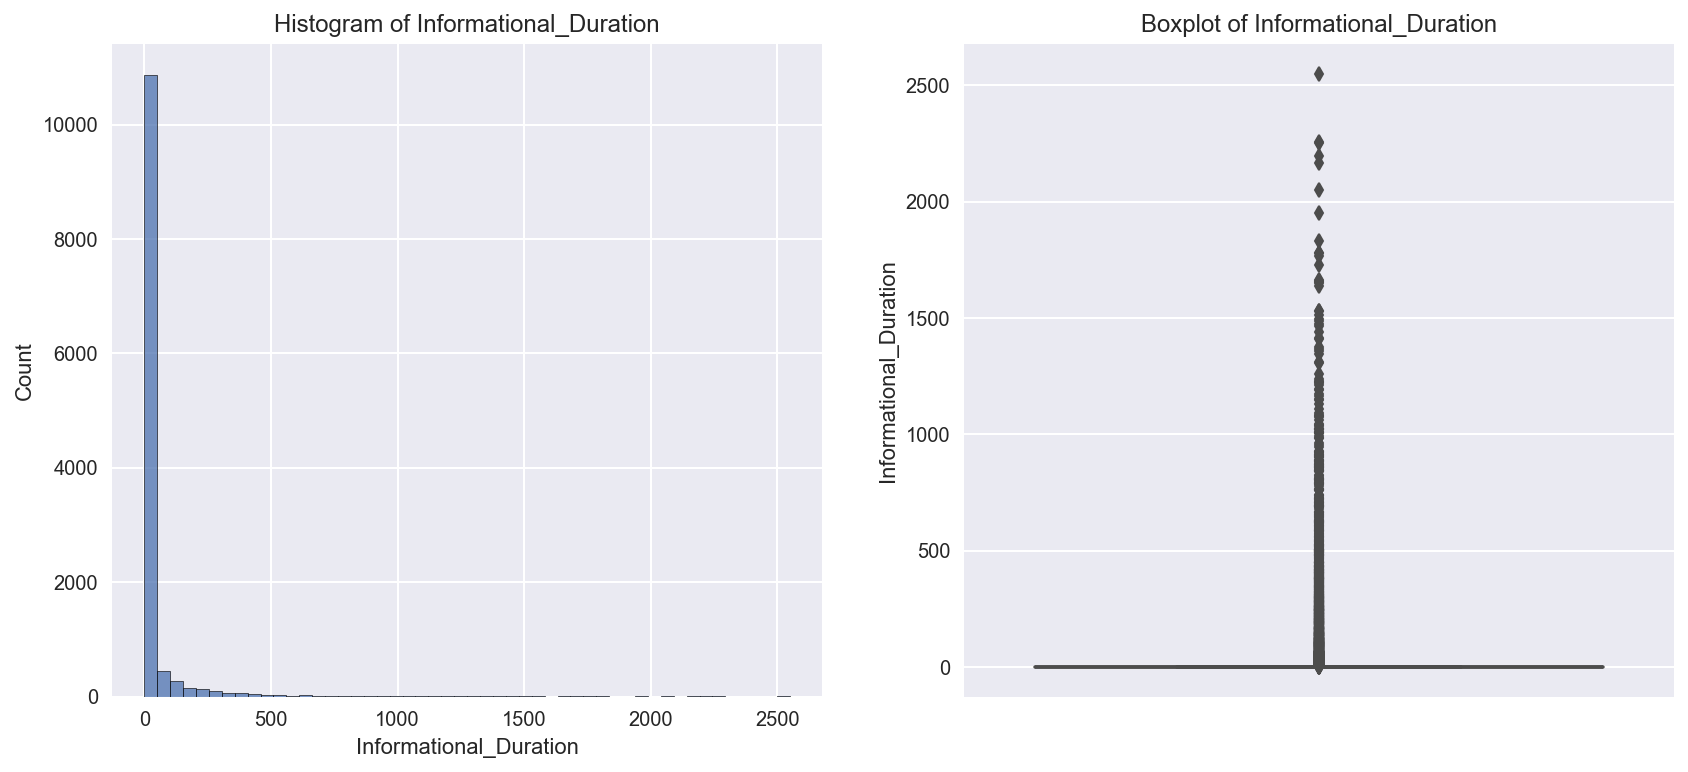

In [13]:
# using histogram and box plot to see the Informational_Duration
hist_box(df, 'Informational_Duration')

The Informational_Duration shows values concentrate near 0. A few customers will spend more time on Informational pages

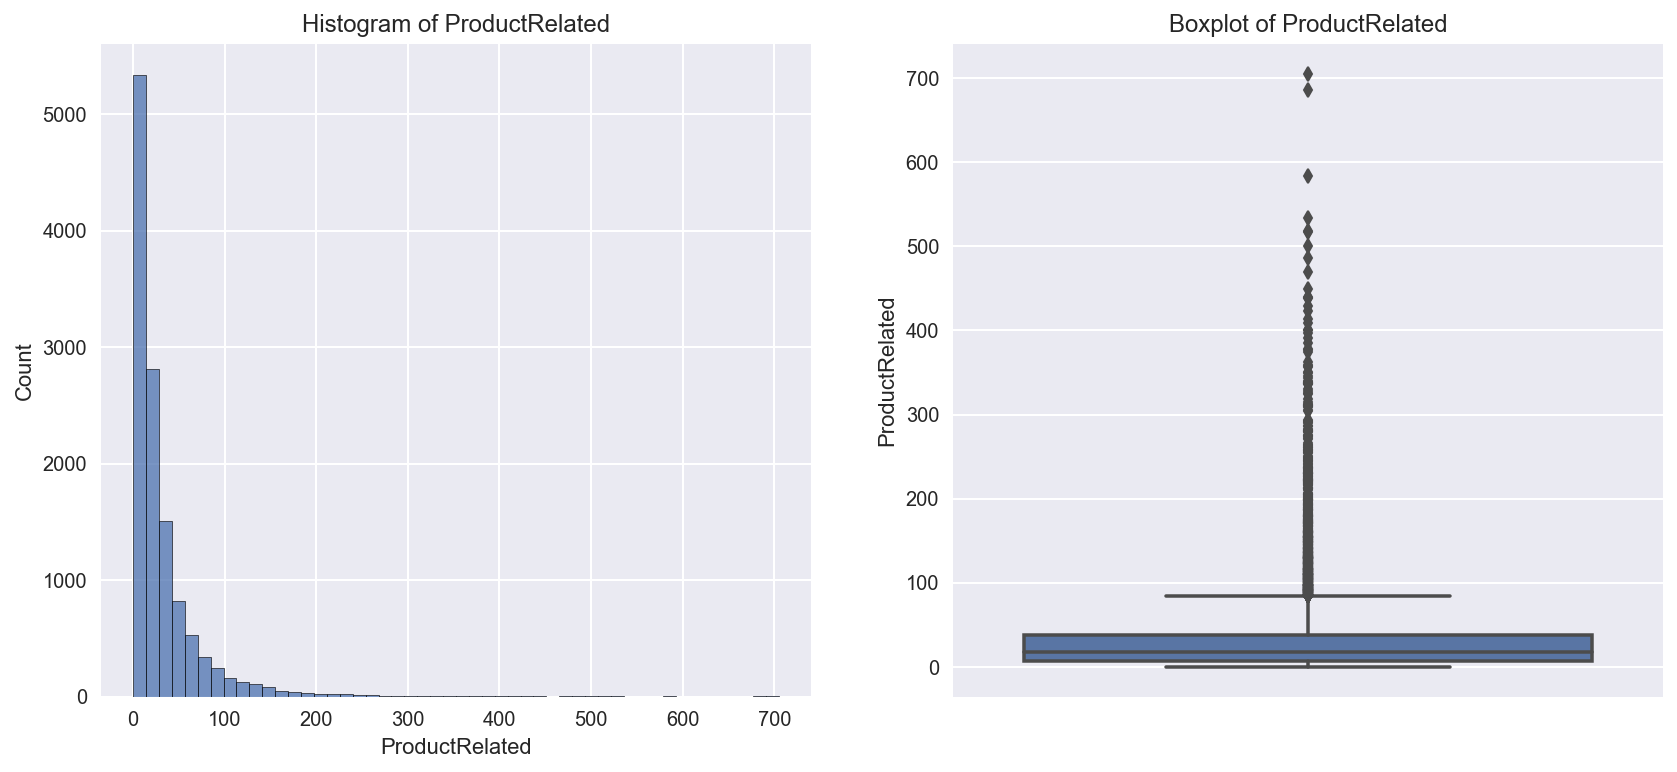

In [14]:
# using histogram and box plot to see the ProductRelated
hist_box(df, 'ProductRelated')

The ProductRelated shows a right skewed distribution and it has outliers.

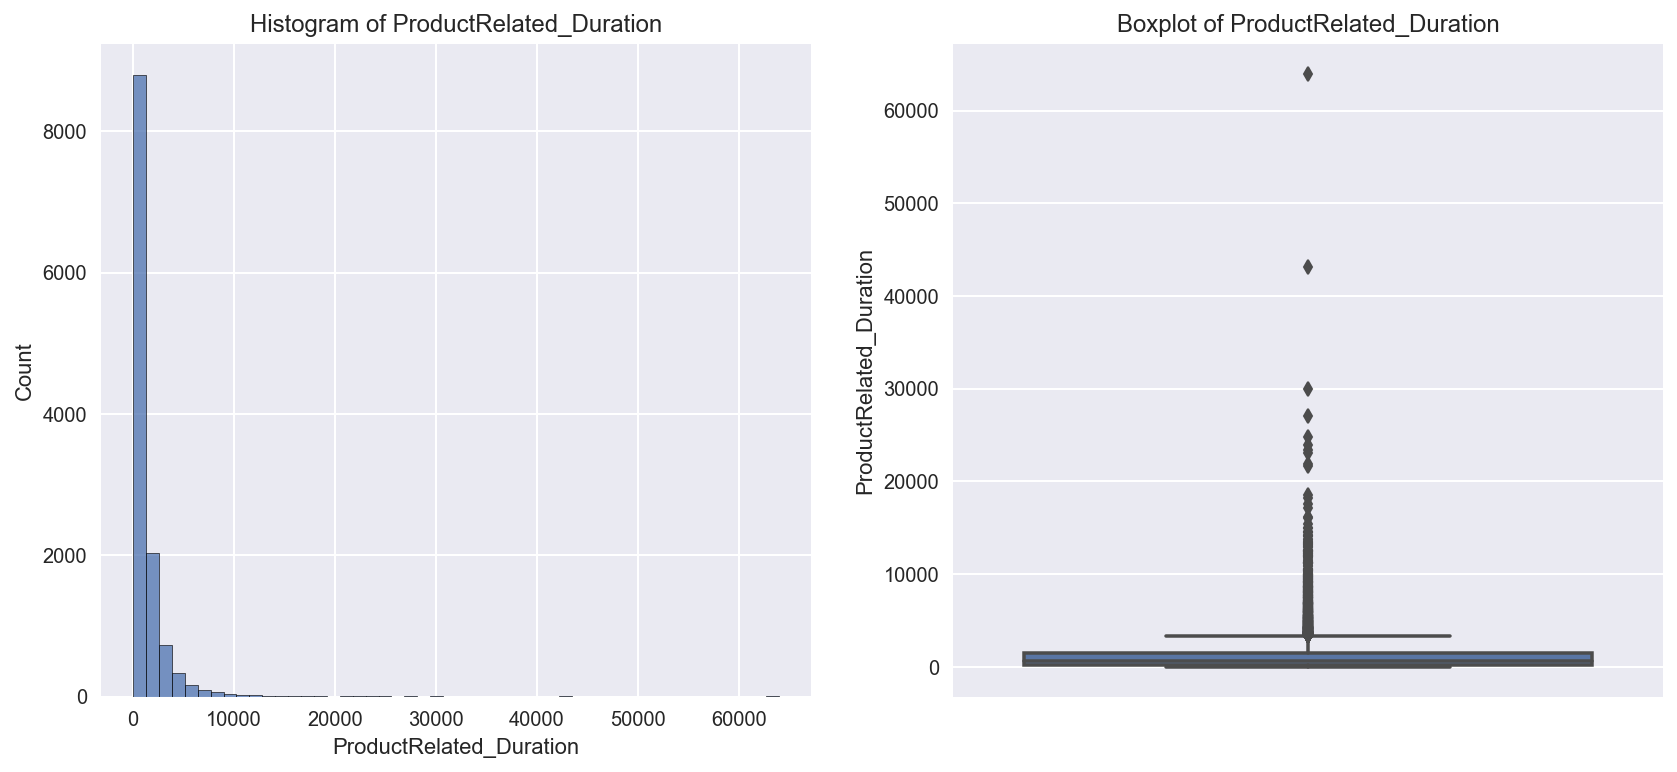

In [15]:
# using histogram and box plot to see the ProductRelated_Duration
hist_box(df, 'ProductRelated_Duration')

The ProductRelated_Duration shows a right skewed distribution and it has outliers.

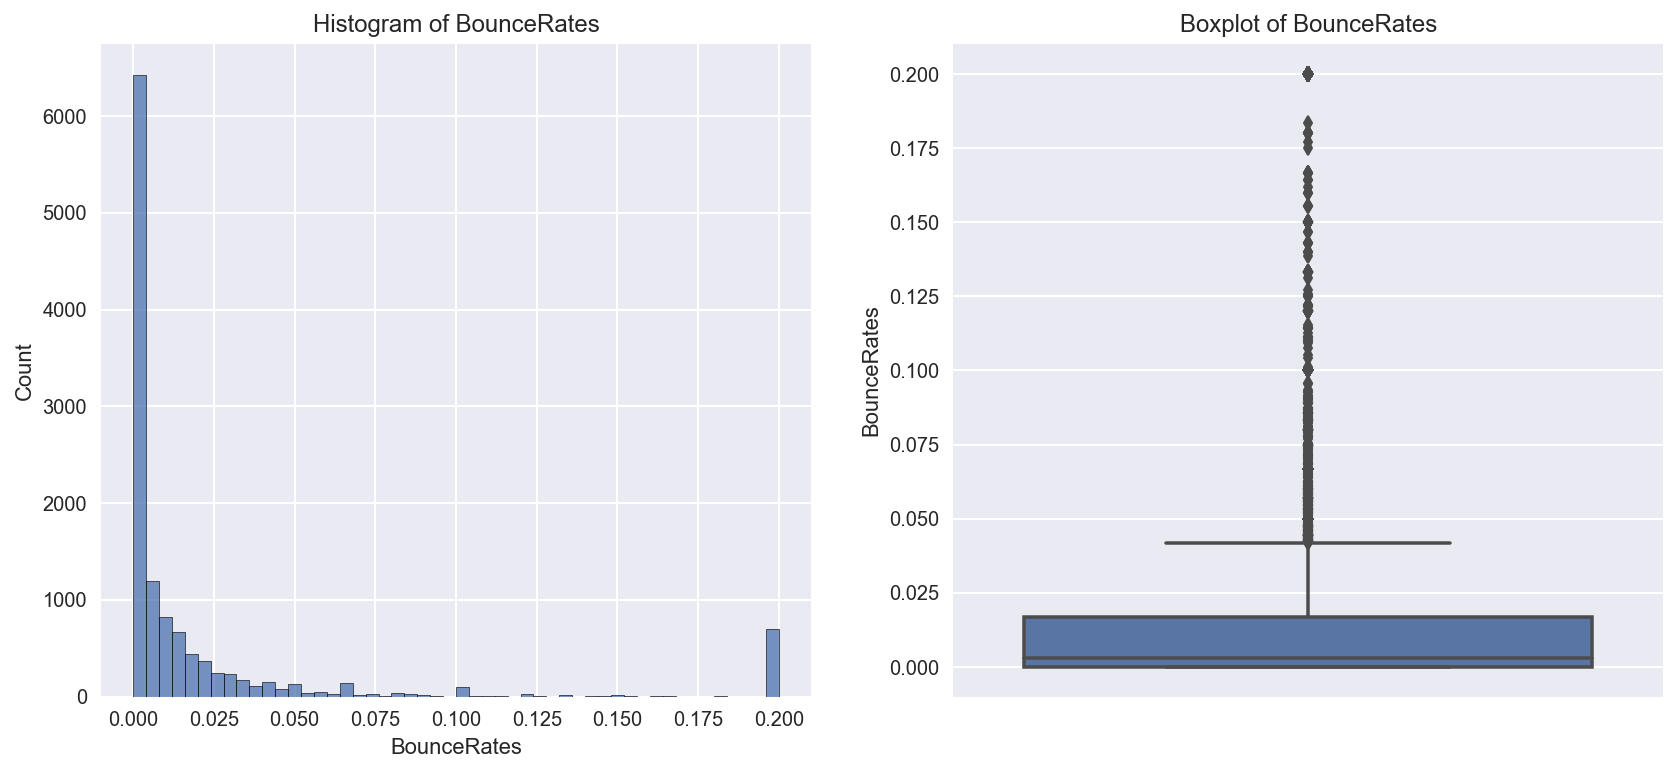

In [16]:
# using histogram and box plot to see the BounceRates
hist_box(df, 'BounceRates')

Bounce rates can be used to help determine the effectiveness or performance of an entry page at generating the interest of visitors.

It shows bimodal distribution. Some pages have high Bounce rates.

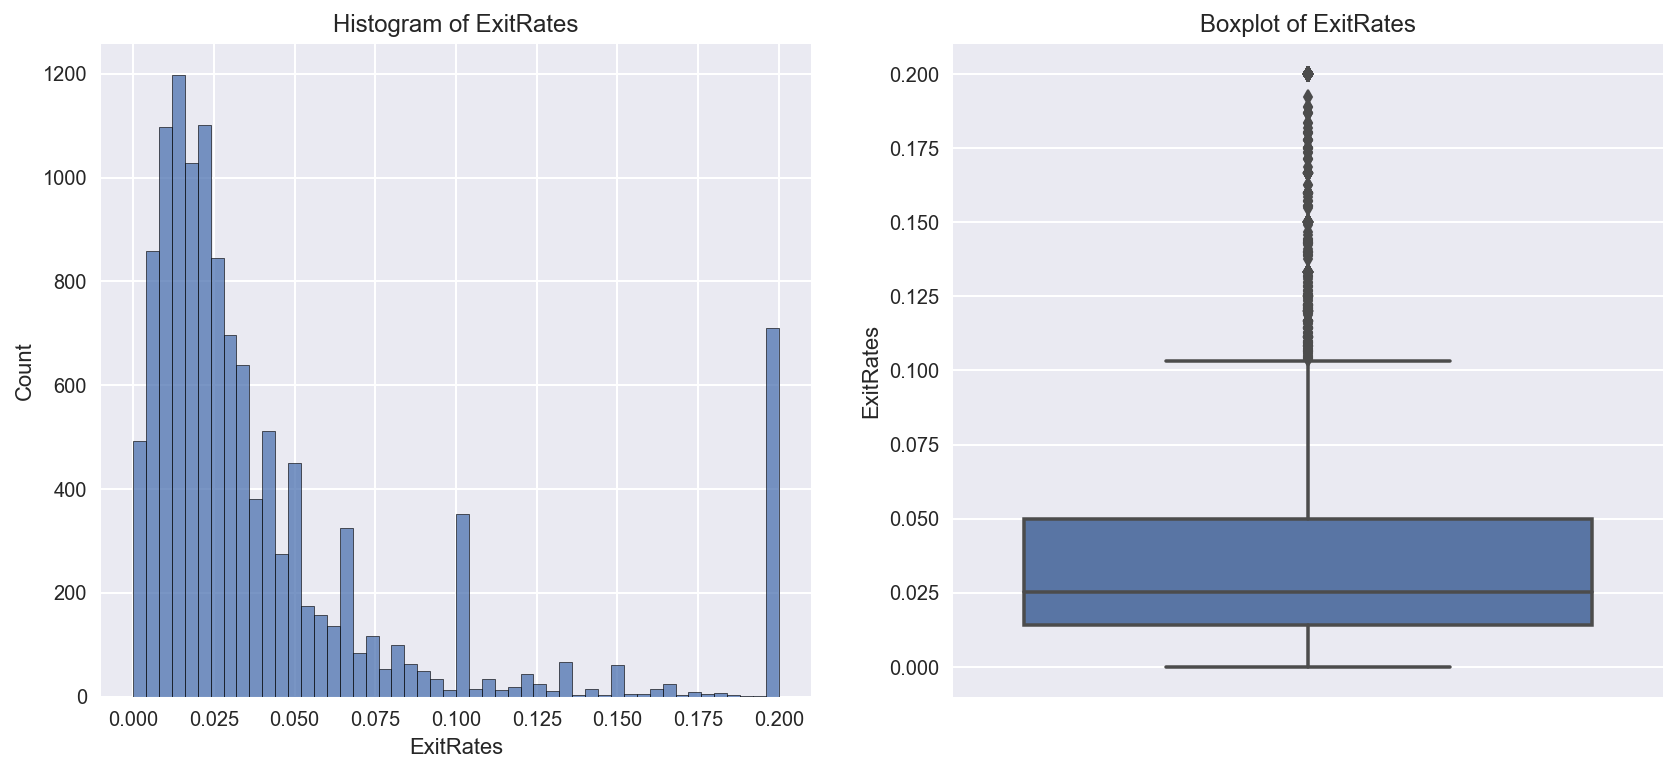

In [17]:
# using histogram and box plot to see the ExitRates
hist_box(df, 'ExitRates')

Exit rate as a term used in web site traffic analysis (sometimes confused with bounce rate) is the percentage of visitors to a page on the website from which they exit the website to a different website. 

It shows bimodal distribution. Some pages have high Exit rate.

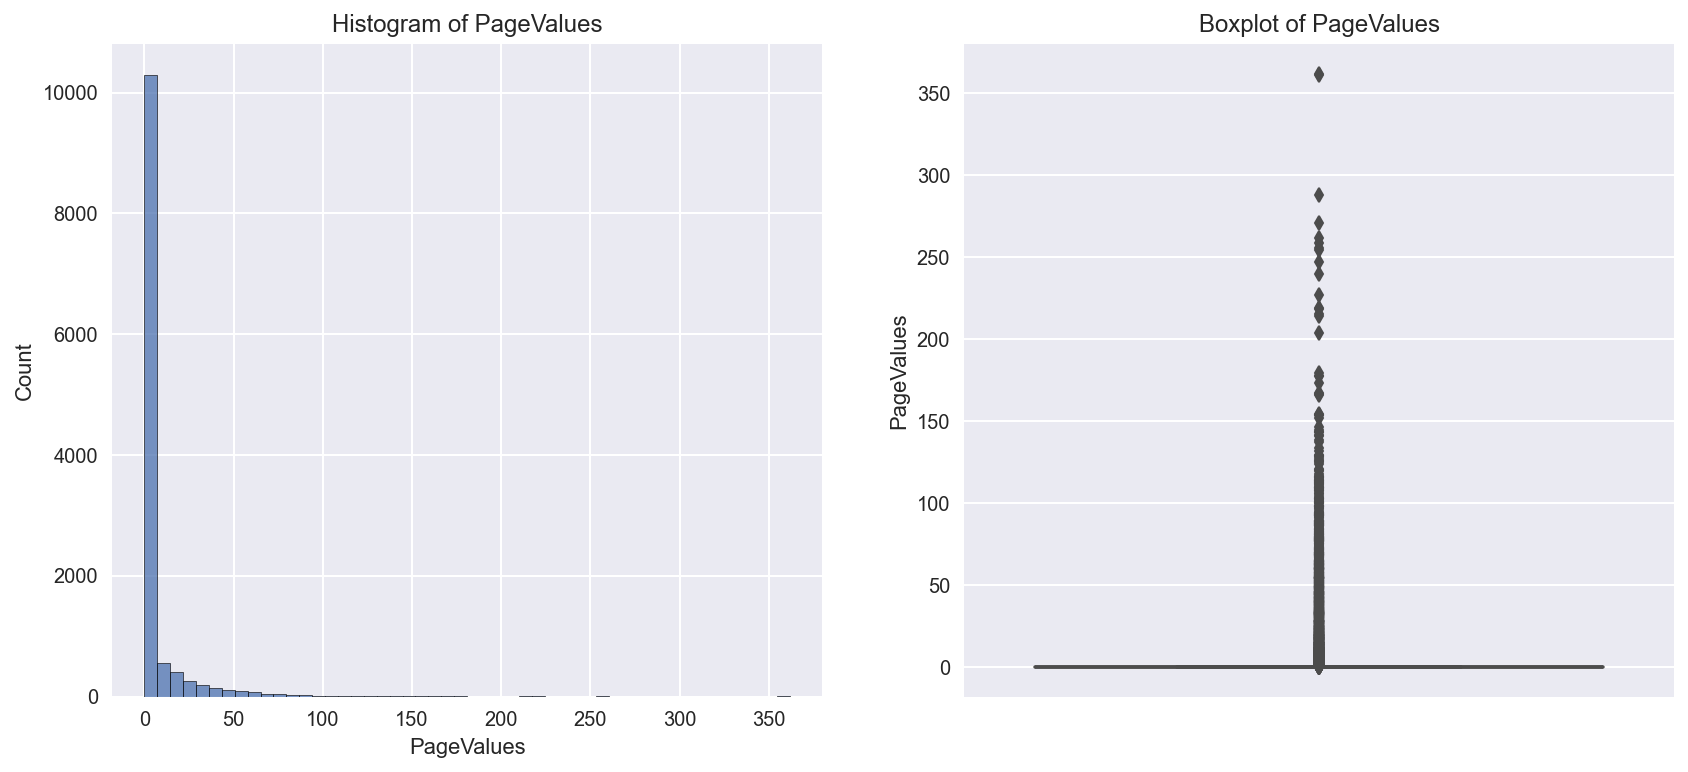

In [18]:
# using histogram and box plot to see the PageValues
hist_box(df, 'PageValues')

Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).

The PageValues shows a right skewed distribution and it has outliers.

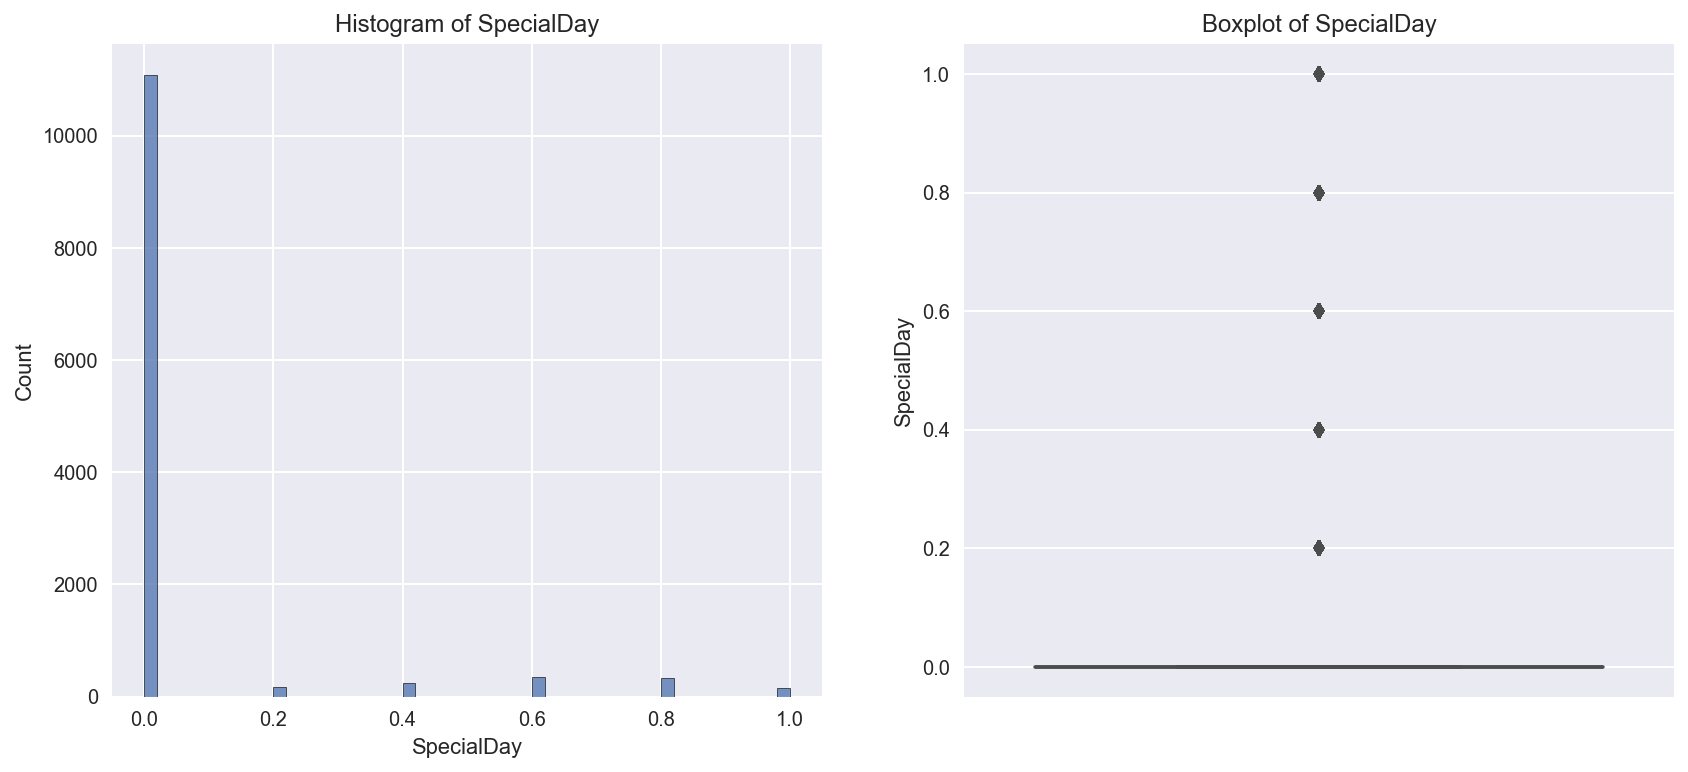

In [19]:
# using histogram and box plot to see the SpecialDay
hist_box(df, 'SpecialDay')

The SpecialDay has 5 values. Most values are 0.0 that shows closeless of the site visiting time to a specific speicial day.

<AxesSubplot:>

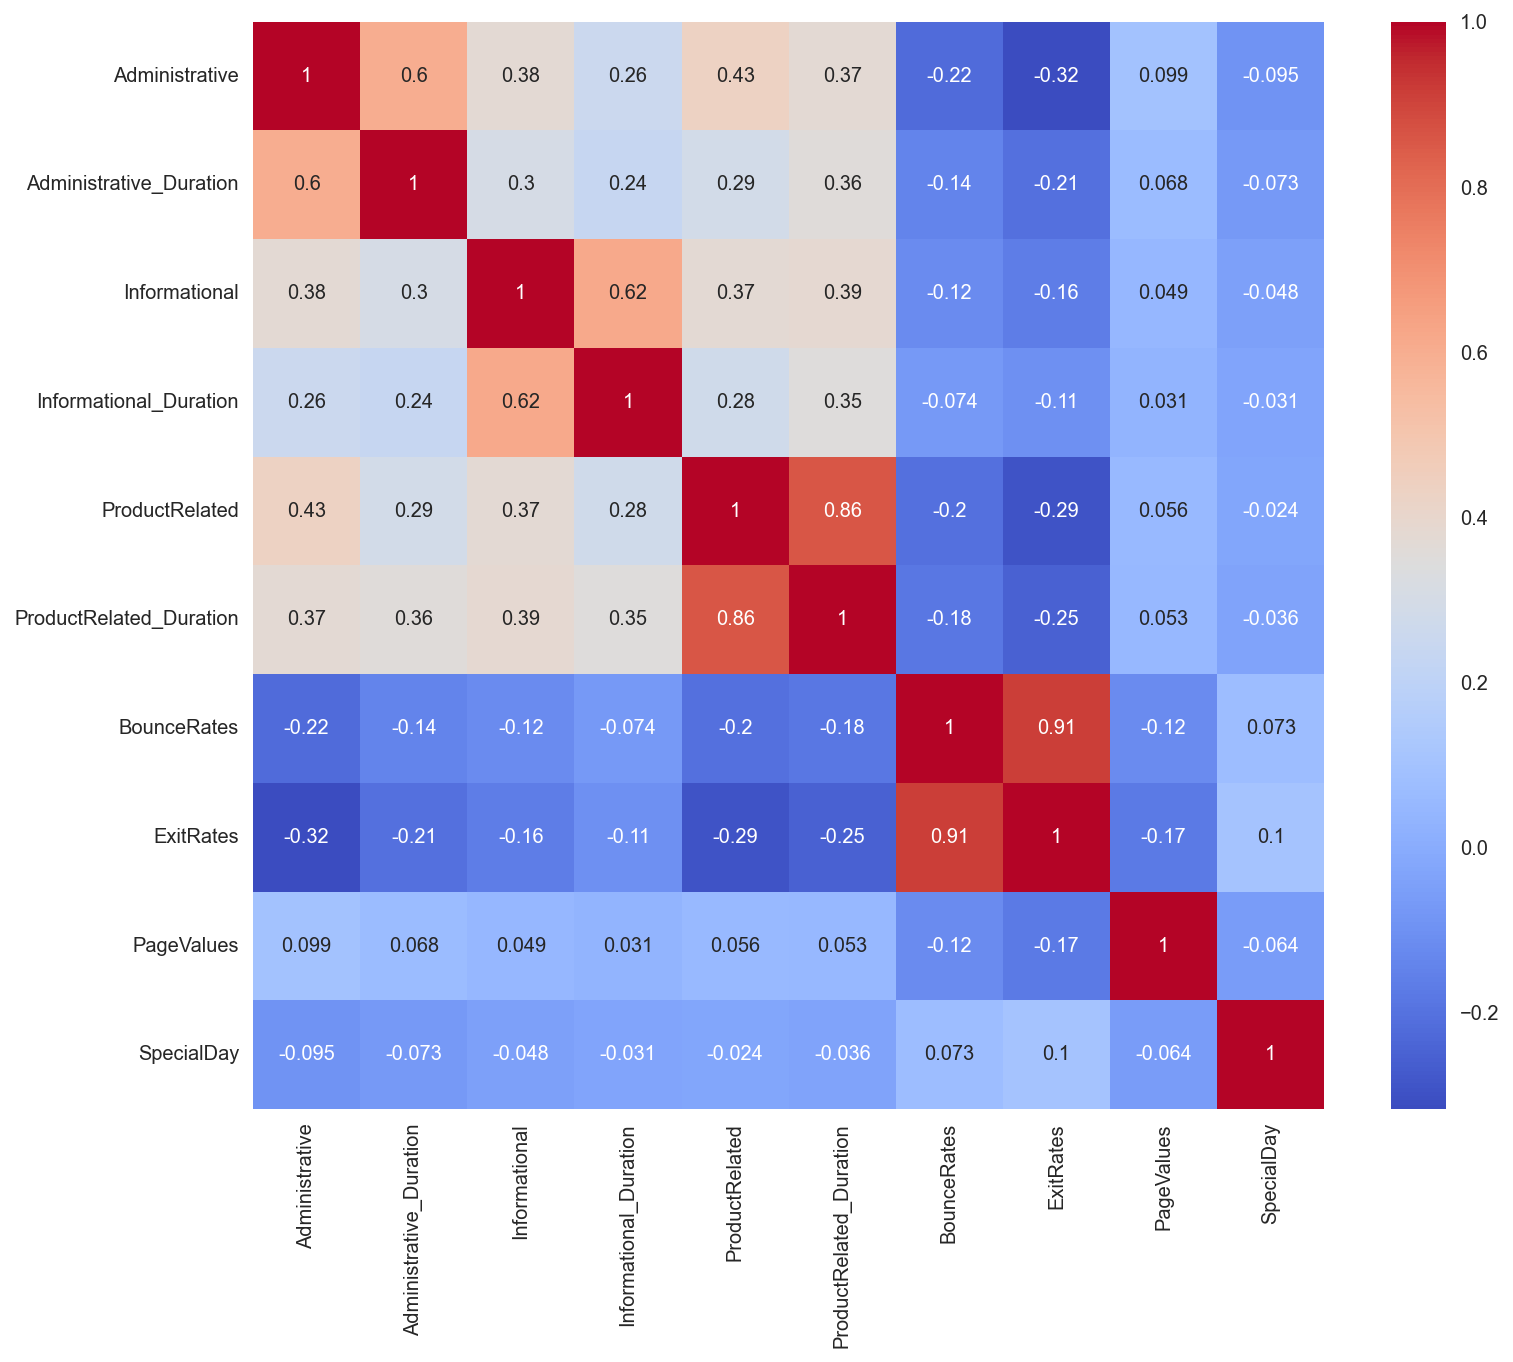

In [20]:
# use heatmap to show the correlation
cm = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm')

('Administrative', 'Administrative_Duration'), ('Informational', 'Informational_Duration'), ('ProductRelated', 'ProductRelated_Duration') have over 0.6 correlation.

'BounceRates' and 'ExitRates' have 0.91 correlation.

<AxesSubplot:>

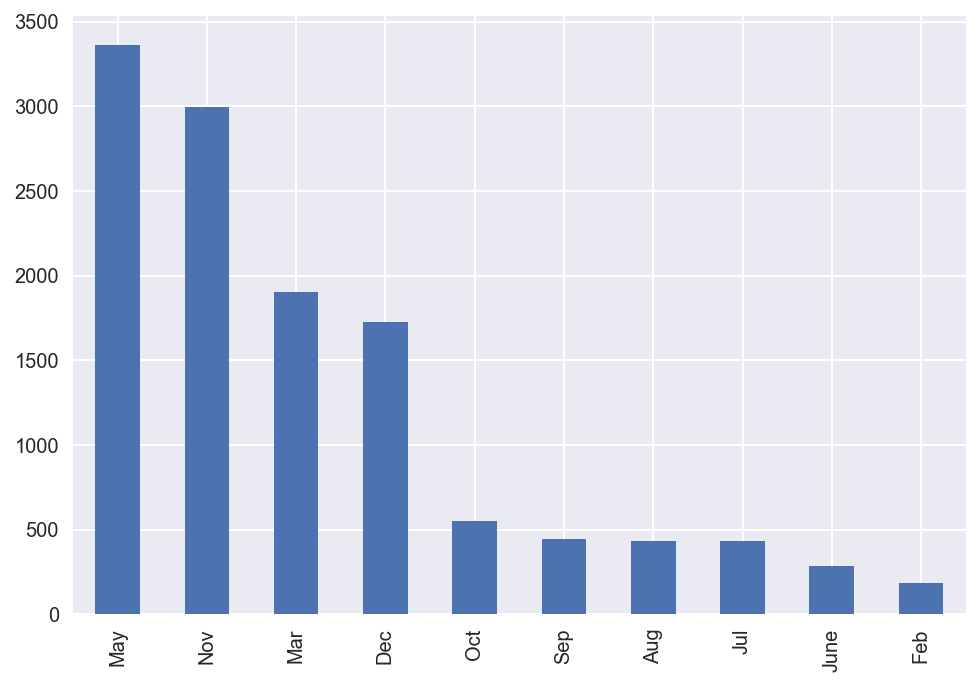

In [21]:
# use bar chart to see the Month
df['Month'].value_counts().plot.bar()

The May, Nov, Mar and Dec have more customers to visit the online retail than other months.

<AxesSubplot:>

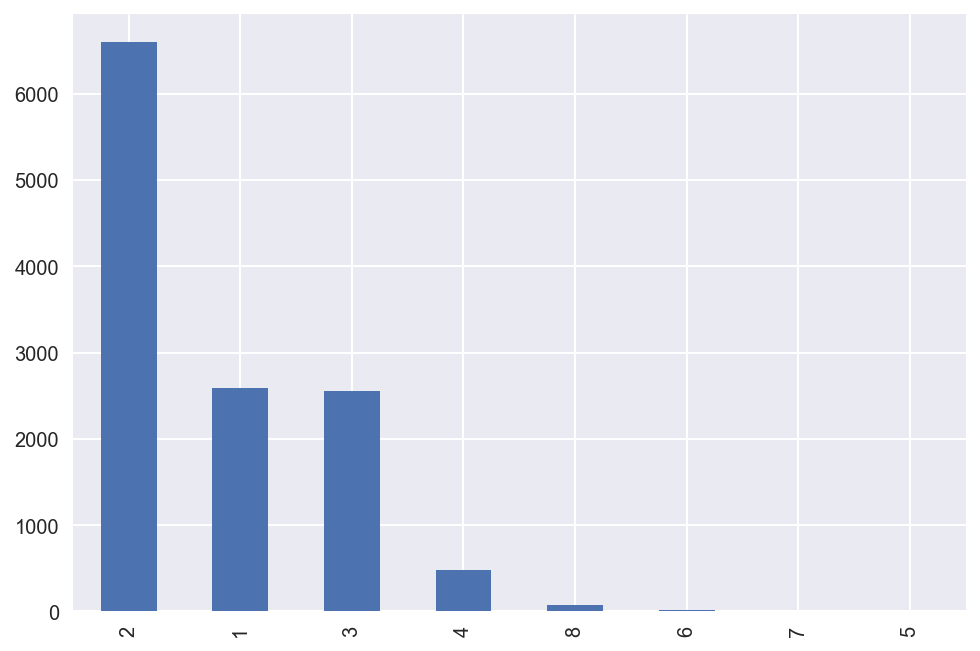

In [22]:
# use bar chart to see the OperatingSystems
df['OperatingSystems'].value_counts().plot.bar()

Customers like using type 2 operation system

<AxesSubplot:>

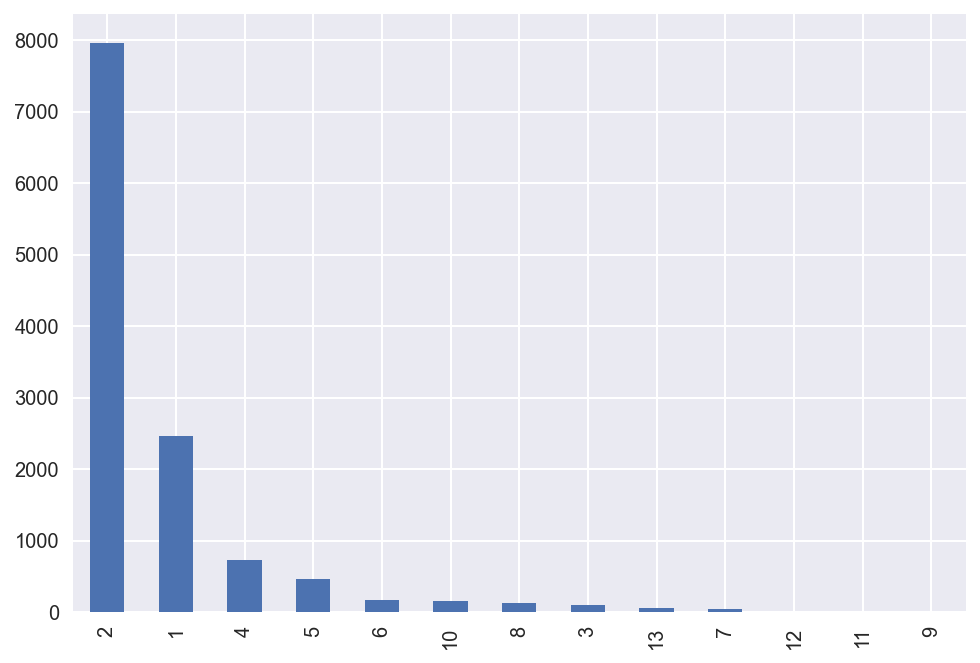

In [23]:
# use bar chart to see the Browser
df['Browser'].value_counts().plot.bar()

Customers like using type 2 Browser

<AxesSubplot:>

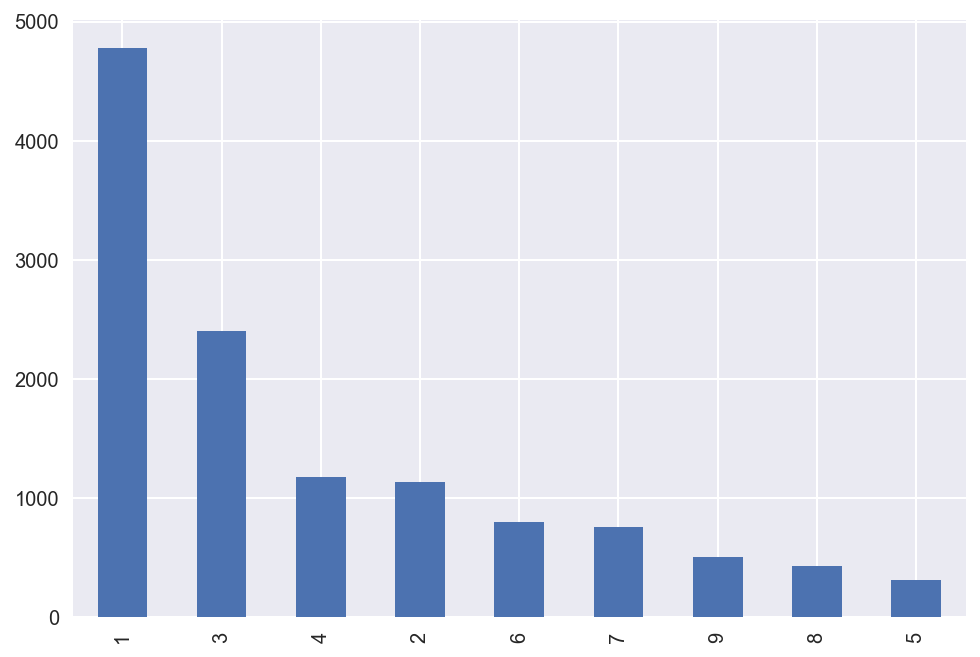

In [24]:
# use bar chart to see the Region
df['Region'].value_counts().plot.bar()

The number of Customers who are in 1 and 3 Regions are higher than other regions

<AxesSubplot:>

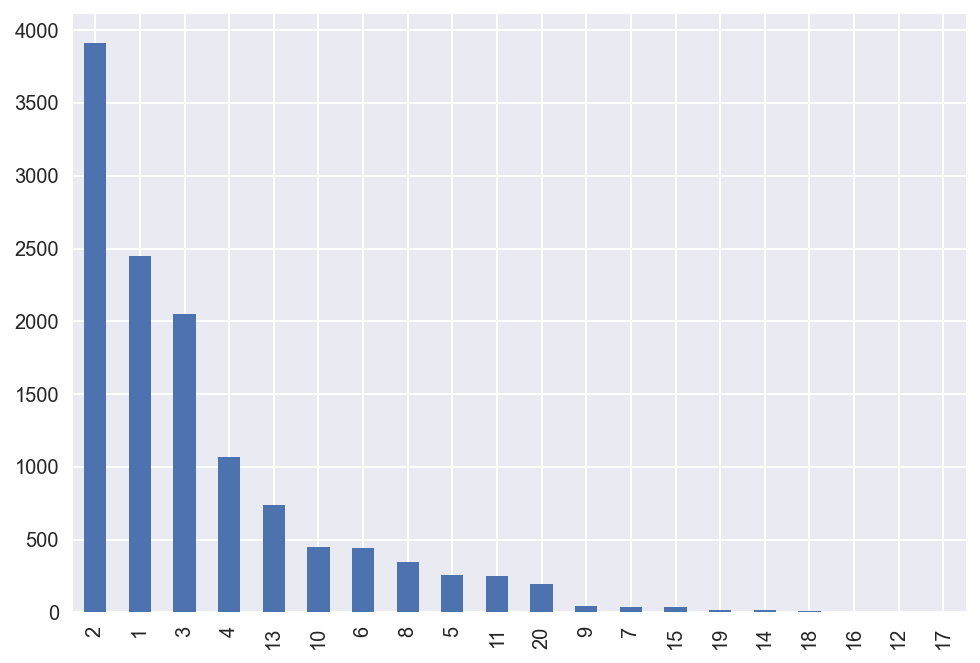

In [25]:
# use bar chart to see the TrafficType
df['TrafficType'].value_counts().plot.bar()

The number of Customers who use 2, 1 and 3 Traffic Type are higher than other types

<AxesSubplot:>

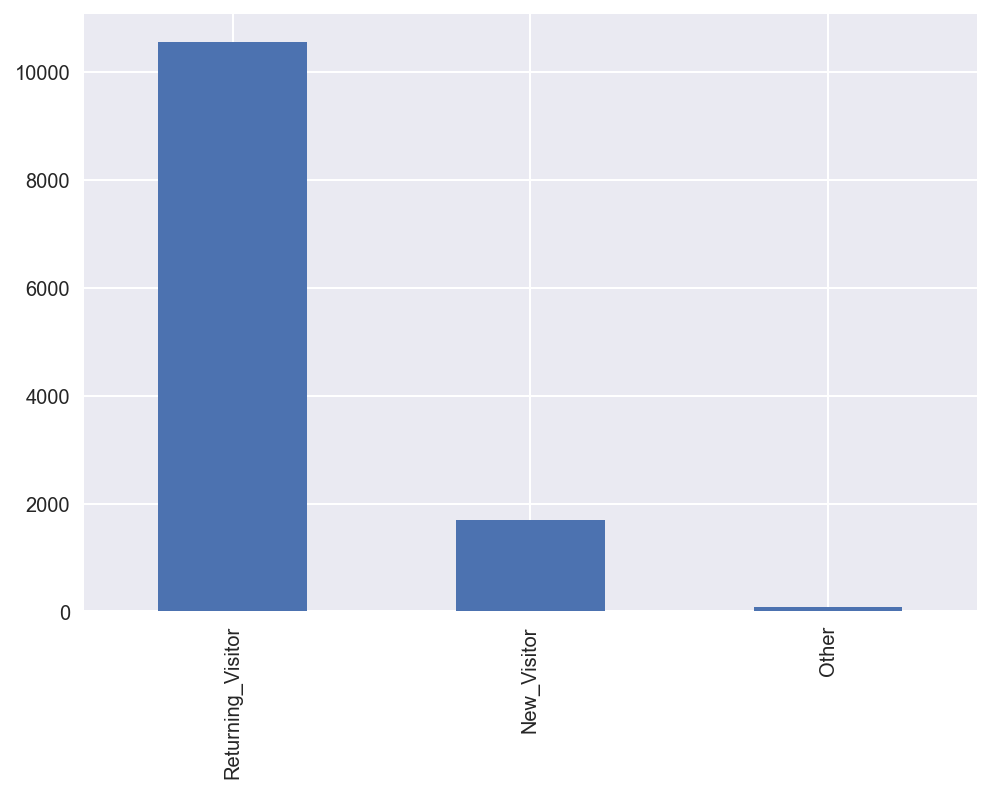

In [26]:
# use bar chart to see the VisitorType
df['VisitorType'].value_counts().plot.bar()

The returning visitor accounts for the most.

<AxesSubplot:>

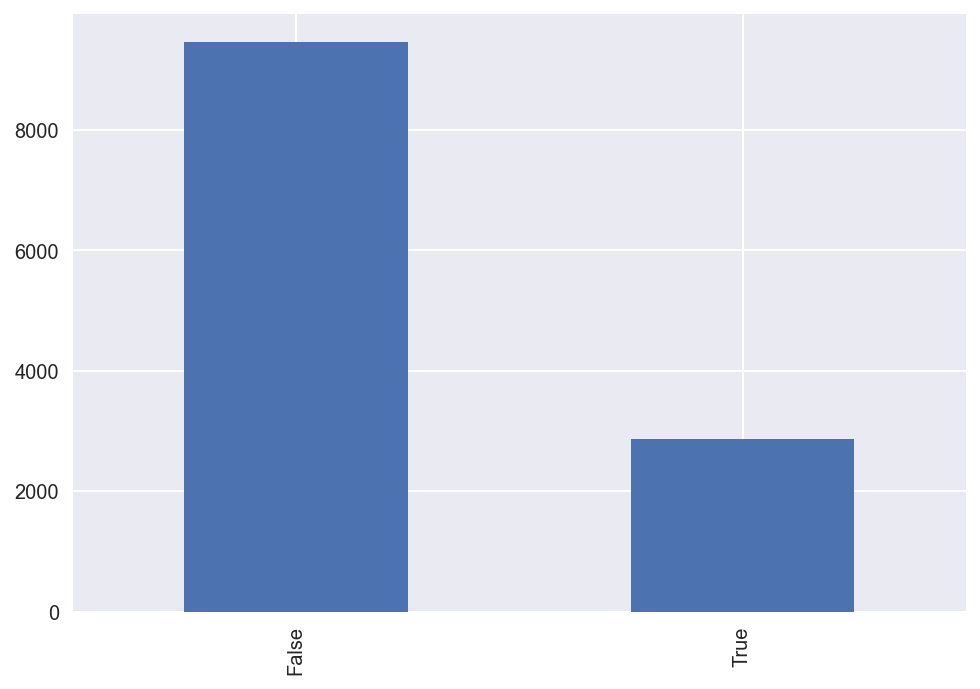

In [27]:
# use bar chart to see the Weekend
df['Weekend'].value_counts().plot.bar()

The number of visits on weekdays is 4 times the figure for weekends.

### Summary

**Numerical variabels:**

The value of Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', and 'ProductRelated_Duration' concentrate near 0.

('Administrative', 'Administrative_Duration'), ('Informational', 'Informational_Duration'), ('ProductRelated', 'ProductRelated_Duration') have over 0.6 correlation.

'BounceRates' and 'ExitRates' show bimodal.

'BounceRates' and 'ExitRates' have 0.91 correlation.

**Drop extra outliers**
There are many extra outliers in numerical variables. They should be dropped.

**Categorical variabels:**

The May, Nov, Mar and Dec have more customers to visit the online retail than other months.

Customers like using type 2 operation system.

Customers like using type 2 Browser.
The number of Customers who are in 1 and 3 Regions are higher than other regions.

The number of Customers who use 2, 1 and 3 Traffic Type are higher than other types.

The returning visitor accounts for the most.

The number of visits on weekdays is 4 times the figure for weekends.



# 4. Pre-Clustering Data Preparation
- Drop duplications
- Convert data type for categories
- Drop extra outliers for numerical variables
- Standardization & Dummy

### Drop duplications

In [28]:
# To check whether there are duplicated rows in the data set
dup_rows = df.duplicated( keep='first')

dup_rows.value_counts()

False    12205
True       125
dtype: int64

The data set has 125 duplicated rows. They account for 1% of data set.

Next I will drop these duplicates. Drop the last duplicate, keep the first one.

In [29]:
no_duplicates_df = df.drop_duplicates(keep='first', inplace=False)
no_duplicates_df.shape

(12205, 17)

### Convert data type for categories
'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend' convert to category

In [30]:
for col in ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']:
    no_duplicates_df[col] = no_duplicates_df[col].astype("category")

In [31]:
no_duplicates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  category
 12  Browser                  12205 non-null  category
 13  Region                   12205 non-null  category
 14  Traffi

### Drop extra outliers for numerical variable
In the EDA, I found that some extra outlers are in numerical variables (exclude 'SpecialDay'). I will drop them that are larger than (mean + 5 * std).

In [32]:
def two_box_compare(ori_df, now_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Original data ")
    sns.boxplot(y=ori_df[col], orient="v",ax=axes[0])
    
    axes[1].set_title("New data ")
    sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        
        #Q1 = data_df[col].quantile(0.25)
        #Q3 = data_df[col].quantile(0.75)
        #IQR = Q3 - Q1

        # Creating notinvalidarea dataframe with boolean values:
        # False means these values are into the valid area 
        # True indicates presence of an outlier
        #notinvalidarea = (onlinenews < (Q1 - 1.5 * IQR)) | (onlinenews > (Q3 + 1.5 * IQR))
        
        #del_outliers = data_df[(data_df[col] < (Q1 - sigema * IQR)) | (data_df[col] > (Q3 + sigema * IQR)) ]

        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f %%. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df


from IPython.display import HTML, display
def display_html_statistic_table(ori, now, title1="1st", title2="2nd",col=""):
    

        
    html = "<table>"
    html += "<tr><td>%s</td><td>%s</td><td>%s</td></tr>" %(col, title1, title2)
    html += "<tr><td>%s</td><td>%d</td><td>%d</td></tr>" %('count', ori[col].shape[0], now[col].shape[0])
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('mean', ori[col].mean(), now[col].mean())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('std', ori[col].std(), now[col].std())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('min', ori[col].min(), now[col].min())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('25%', ori[col].quantile(0.25), now[col].quantile(0.25))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('50%', ori[col].quantile(0.50), now[col].quantile(0.50))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('75%', ori[col].quantile(0.75), now[col].quantile(0.75))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('max', ori[col].max(), now[col].max())

    html += "</table>"
    display(HTML(html))

check all outliers of numeric variables (exclude 'SpecialDay')

In [33]:
extra_outs_num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

In [34]:
# Getting outliers that larger than (mean + N * std).
del_n_sigema_outliers_df = drop_outliers(no_duplicates_df, extra_outs_num_cols, 5.0)

There are 431 outliers that account for 3.53 %. They all large than (5.0 * std + mean) of column.


In [35]:
# copy a data set to test
del_test_df_n_sigema = no_duplicates_df.copy()

In [36]:
# drop outliers
del_test_df_n_sigema.drop(del_n_sigema_outliers_df.index.values, inplace=True)

In [37]:
del_test_df_n_sigema.shape

(11774, 17)

In [38]:
# orginal data set
no_duplicates_df[extra_outs_num_cols].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000


In [39]:
# without outliers data set
del_test_df_n_sigema[extra_outs_num_cols].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative,1.000000,0.688656,0.331417,0.249505,0.414211,0.356935,-0.218407,-0.317979,0.137043
Administrative_Duration,0.688656,1.000000,0.270295,0.210839,0.279148,0.284418,-0.166278,-0.248145,0.110387
Informational,0.331417,0.270295,1.000000,0.673393,0.317491,0.308246,-0.114101,-0.165353,0.075660
Informational_Duration,0.249505,0.210839,0.673393,1.000000,0.232765,0.237500,-0.085035,-0.127585,0.069680
ProductRelated,0.414211,0.279148,0.317491,0.232765,1.000000,0.844322,-0.225739,-0.332334,0.089788
ProductRelated_Duration,0.356935,0.284418,0.308246,0.237500,0.844322,1.000000,-0.212986,-0.299149,0.100742
BounceRates,-0.218407,-0.166278,-0.114101,-0.085035,-0.225739,-0.212986,1.000000,0.902690,-0.130219
ExitRates,-0.317979,-0.248145,-0.165353,-0.127585,-0.332334,-0.299149,0.902690,1.000000,-0.193458
PageValues,0.137043,0.110387,0.075660,0.069680,0.089788,0.100742,-0.130219,-0.193458,1.000000


##### The above correlation tables show that correlations have gone up and down respectively. These changes are acceptable.

I will drop outliers with (mean + 5 * std)

In [40]:
prepared_df = del_test_df_n_sigema.copy()
prepared_df.shape

(11774, 17)

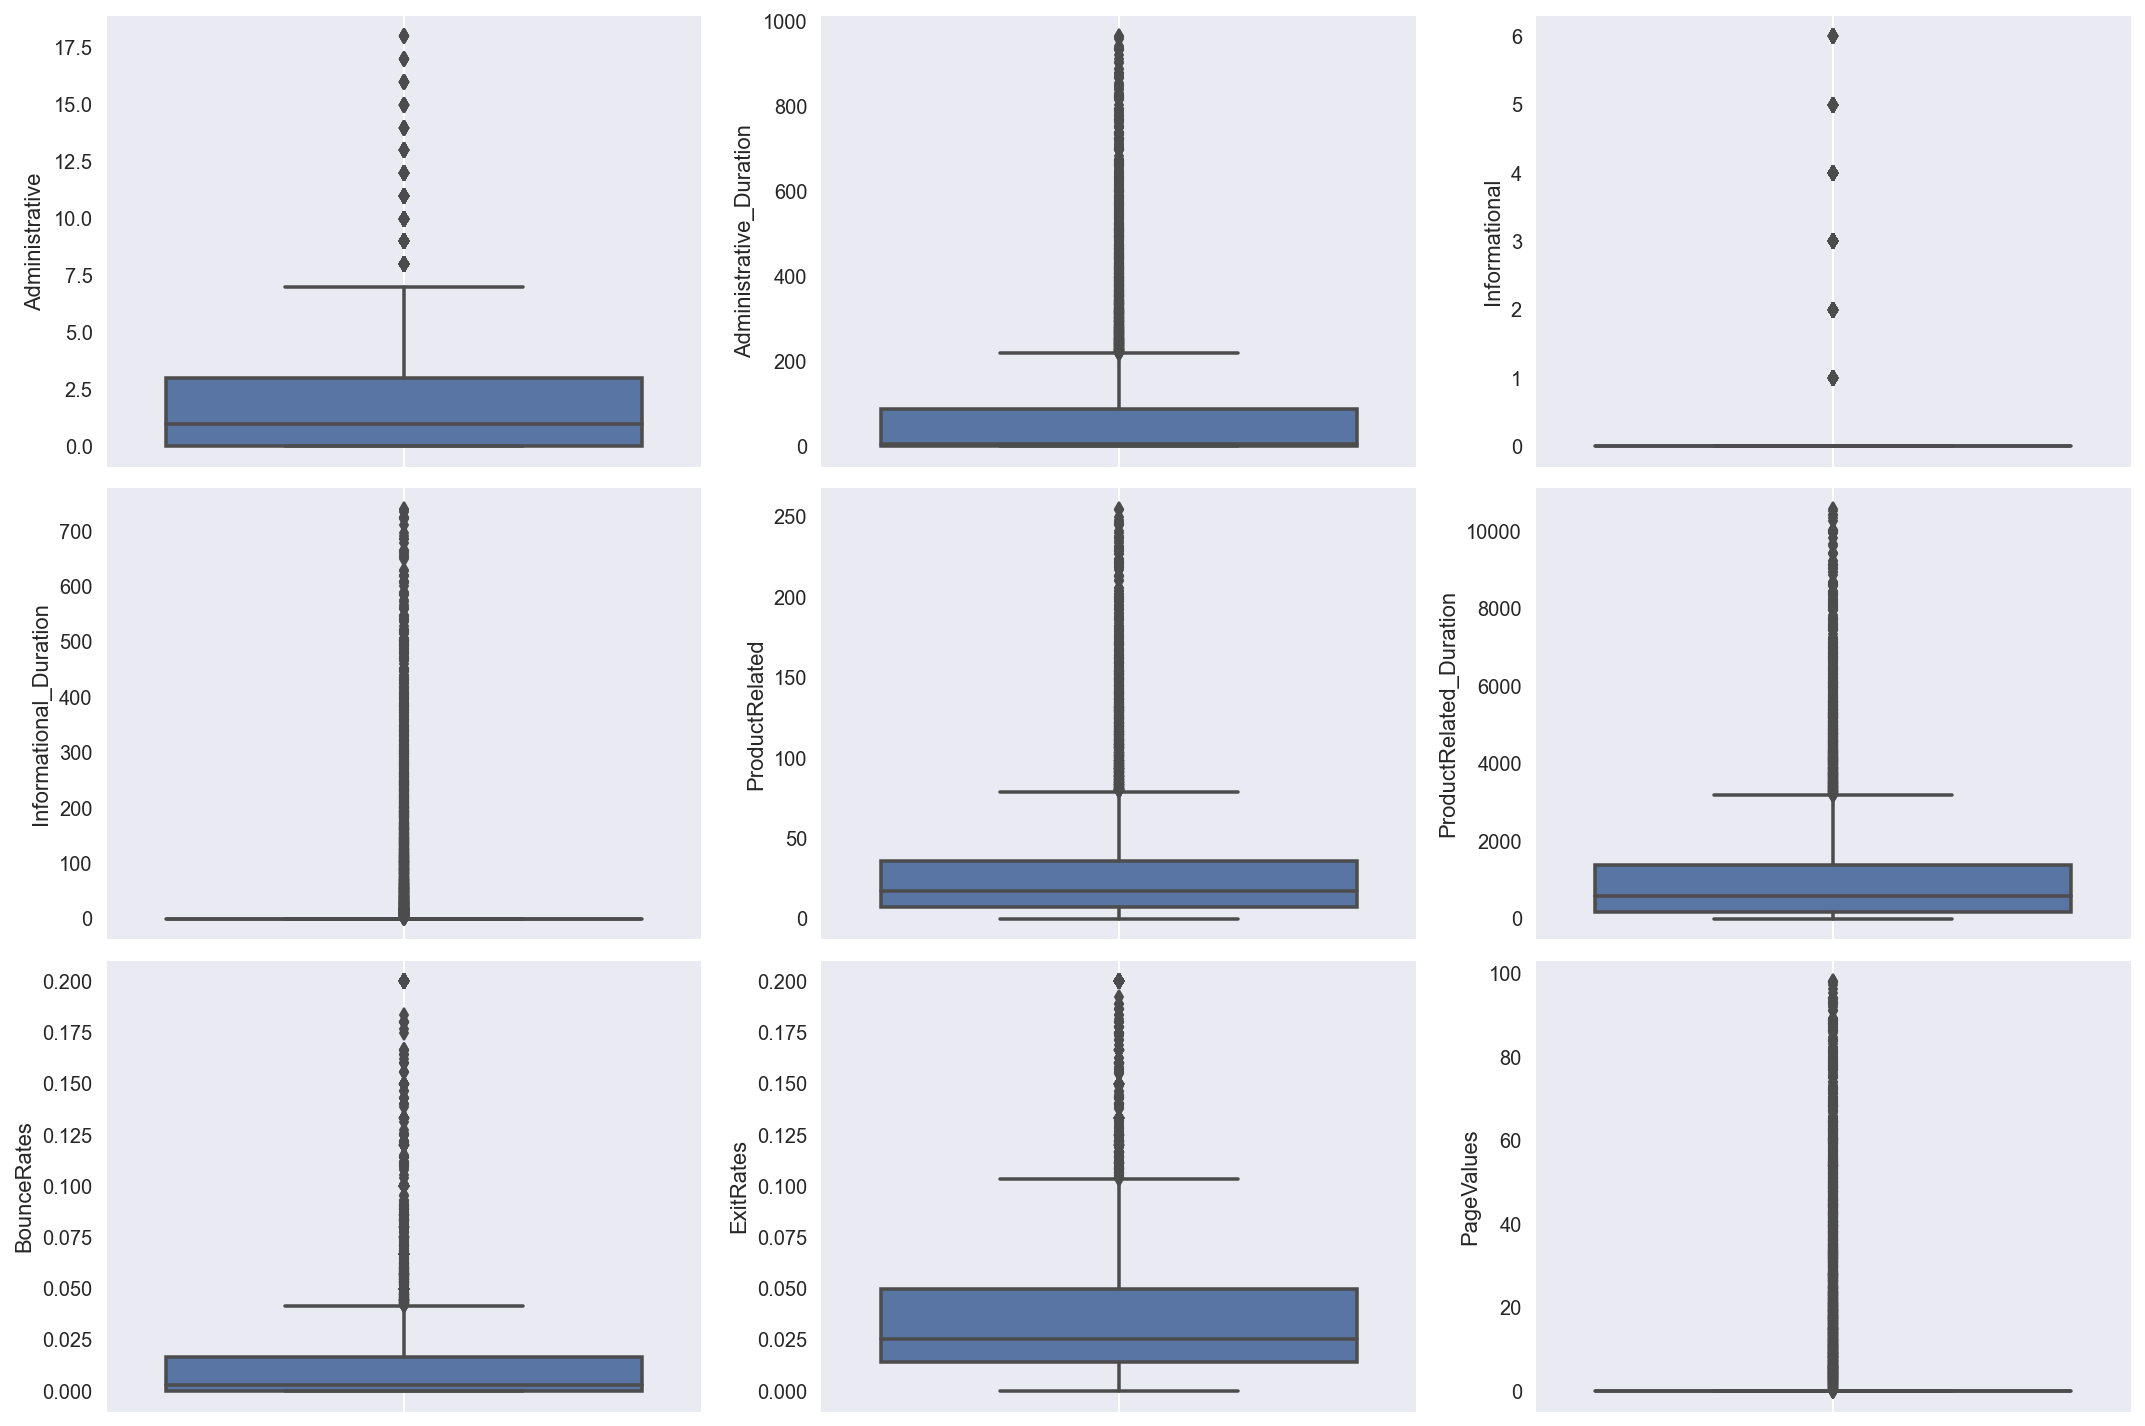

In [41]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(extra_outs_num_cols):
    plt.subplot(3,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=prepared_df, y=col, orient="v")
    plt.grid()
    plt.tight_layout()

Those extra outliers have been dropped.

### Standardization & Dummy

I use StandardScaler to convert numerical variables from different scales to the same scales.

Dummy the categories

In [42]:
# copy a data set
prepared_df_copy = prepared_df.copy()

#### Standardization for numerical variables 

In [43]:
stand_num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'PageValues', 'SpecialDay']

In [44]:
std = preprocessing.StandardScaler()
fitted = std.fit_transform(prepared_df_copy[stand_num_cols])

In [45]:
prepared_df_copy = prepared_df_copy.assign(**{c:fitted[:,i] for i, c in enumerate(stand_num_cols)})

In [46]:
# check StandardScaler
prepared_df_copy.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.706315,-0.551313,-0.412167,-0.286223,-0.613648,-0.612323,-0.454699,0.028571,3.571969,-0.313899,May,1,1,1,2,New_Visitor,True
1,-0.706315,-0.551313,-0.412167,-0.286223,-0.436740,-0.020109,-0.143881,0.047619,-0.362453,-0.313899,Mar,2,2,4,2,Returning_Visitor,False
2,0.592070,-0.248422,1.592729,0.832746,-0.731587,-0.703370,-0.454699,0.017500,-0.362453,-0.313899,Nov,2,2,9,2,New_Visitor,False


#### Dummy the categories

In [47]:
# Dummy the categorival variables
prepared_df_copy = pd.get_dummies(prepared_df_copy, drop_first=True)
prepared_df_copy.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,-0.706315,-0.551313,-0.412167,-0.286223,-0.613648,-0.612323,-0.454699,0.028571,3.571969,-0.313899,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.706315,-0.551313,-0.412167,-0.286223,-0.436740,-0.020109,-0.143881,0.047619,-0.362453,-0.313899,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.592070,-0.248422,1.592729,0.832746,-0.731587,-0.703370,-0.454699,0.017500,-0.362453,-0.313899,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Cluster Modeling
- hierarchical
- K-means

### Hierarchical

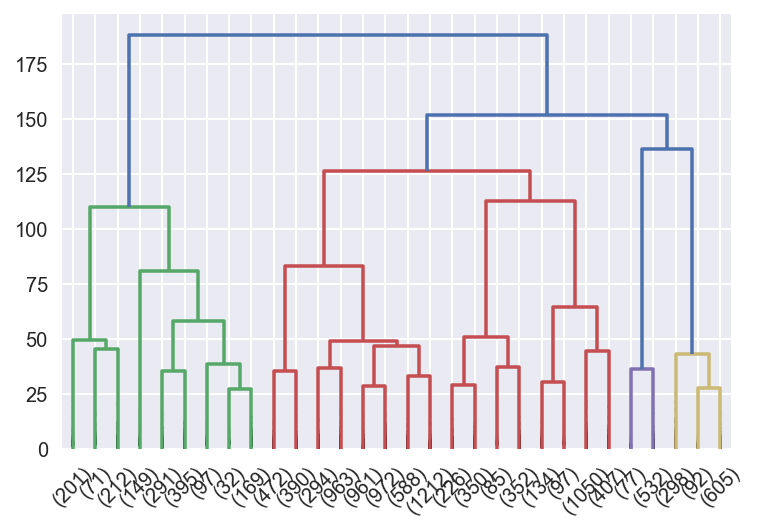

In [48]:
# ’ward’ uses the Ward variance minimization algorithm

from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(prepared_df_copy, method="ward"),
    truncate_mode="lastp",
    # p=10,
    show_contracted=True,
)

To help us identify the **"best"** number of final clusters to utilize in a hierarchical cluster, we can "draw" a horizontal line across the **tallest** branches (i.e., vertical lines) of the "tree" while ensuring that none of the underlying clusters overlap with one another.

From the above dendrogram, we can see **the tallest branches are two blue vertical lines**. 

Let’s set this threshold as **175** and draw a horizontal line: The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters.

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

### K-means

Text(0, 0.5, 'Inertia')

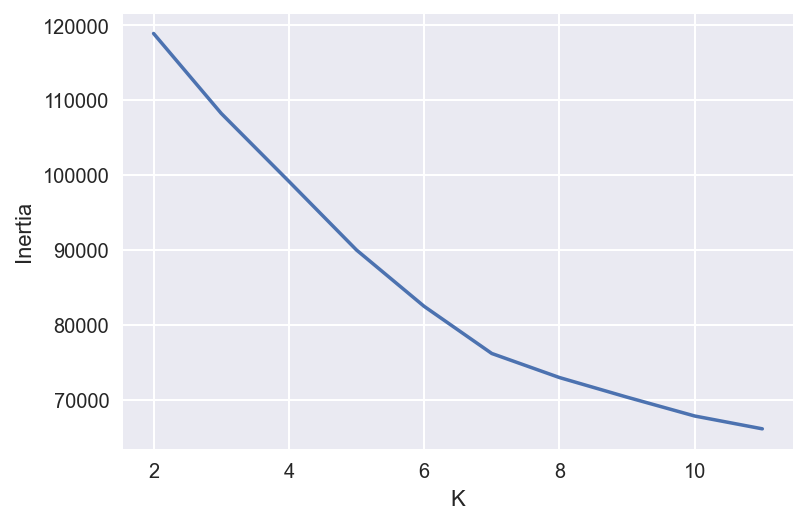

In [50]:
from sklearn.cluster import KMeans
# inertia
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(prepared_df_copy)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

From Inertia line plot, we can not see there is an obvious elbow. So let's select k = 7 because a small elbow can be see there.

array([[<AxesSubplot:xlabel='k'>]], dtype=object)

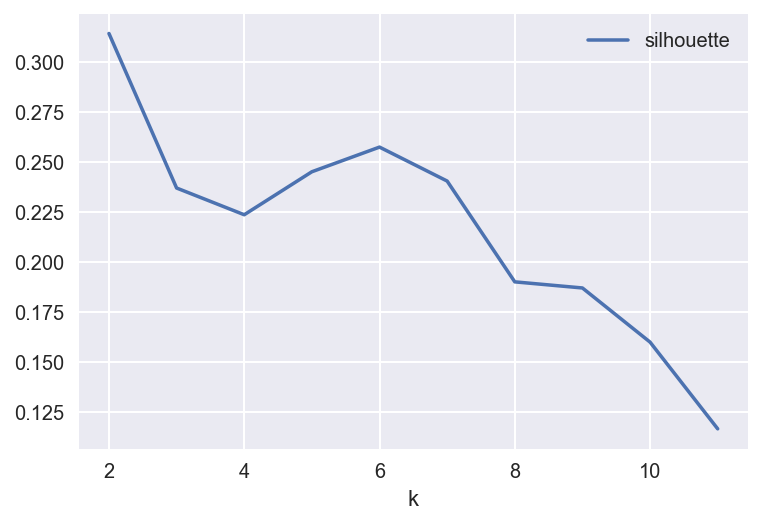

In [51]:
from sklearn import metrics
sils = []

sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(prepared_df_copy)

    sils.append(
        metrics.silhouette_score(prepared_df_copy, k2.labels_)
    )

fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "silhouette": sils,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(1, 1))
)
#fig.savefig("images/mlpr_1802.png", dpi=300)

It looks like the best number of clusters is quite high, at k = 2. Let's select k = 2. 

#### Summary
From the dendrogram of Hierarchical we select the tallest vertical lines (More taller, More distance between clusters). So we get 2 clusters.

From the Inertia plot of K-means we see that an obvious elbow at k = 7. So we select k = 7.

From the silhouette plot of K-means we see the highest value at k = 2. So we select k = 2.

#### Apply a K-means clustering algorithm to the data set using a value of K=2. 

In [52]:
k2 = KMeans(random_state=42, n_clusters=2)
k2.fit(prepared_df_copy)

KMeans(n_clusters=2, random_state=42)

In [53]:
# to compute how many marked = 1 
k2.labels_.sum()

2152

In [54]:
# to compute percentage of marked = 1 
k2.labels_.sum()/ len(k2.labels_) * 100

18.277560727025648

From the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#, it said there were 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

But my K-means(k=2) got over 18% positive class. The result is worth exploring deeply.

# 6. Post-Clustering Exploratory Data Analysis

Perform EDA on these two groupings: what do the summary statistics tell you? Are the groupings
noticeably different from one another?

In [55]:
k2_df = pd.DataFrame(k2.labels_, columns=['k2'])
k2_df.head(3)

,k2
0,0
1,0
2,0


In [56]:
k2_df.shape

(11774, 1)

In [57]:
prepared_df_copy.shape

(11774, 68)

In [58]:
#create NumPy array for 'k2_col'
k2_col = np.array(k2.labels_)

#add 'k2_col' array as new column in DataFrame
prepared_df_copy['k2'] = k2_col.tolist()

In [59]:
k_means_2_df = prepared_df_copy.copy()

In [60]:
k_means_2_df[85:95]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,k2
88,2.215050,1.171705,4.600072,6.918845,0.949038,0.866528,-0.237126,0.020655,-0.155646,-0.313899,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
89,-0.706315,-0.551313,-0.412167,-0.286223,0.713161,3.223957,-0.203653,0.031447,0.544484,-0.313899,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
90,2.539646,0.401785,-0.412167,-0.286223,1.656669,1.183443,-0.454699,0.001916,-0.362453,-0.313899,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
91,-0.057123,-0.357462,-0.412167,-0.286223,-0.377771,-0.450139,-0.358000,0.022222,-0.362453,-0.313899,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
93,-0.706315,-0.551313,-0.412167,-0.286223,-0.407256,-0.182414,0.214757,0.053846,-0.362453,-0.313899,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
94,-0.706315,-0.551313,-0.412167,-0.286223,-0.761071,-0.753931,0.995789,0.133333,-0.362453,-0.313899,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
95,-0.706315,-0.551313,-0.412167,-0.286223,0.093983,-0.048067,-0.454699,0.013441,0.303632,-0.313899,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
96,-0.706315,-0.551313,-0.412167,-0.286223,-0.495710,-0.375461,-0.092077,0.071667,-0.362453,-0.313899,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,-0.706315,-0.551313,-0.412167,-0.286223,-0.525194,-0.495949,-0.059112,0.063636,-0.362453,-0.313899,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
98,-0.381719,-0.313038,-0.412167,-0.286223,0.624707,0.556785,-0.454699,0.010333,3.466025,-0.313899,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
k_means_2_df['k2'].value_counts()

0    9622
1    2152
Name: k2, dtype: int64

In [62]:
k_means_2_df[k_means_2_df['k2'] == 1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,k2
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.0,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.0,2152.000000,2152.0,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.0,2152.000000,2152.000000,2152.000000,2152.000000,2152.0,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.0
mean,1.310947,1.199672,1.250350,1.052470,1.256763,1.203457,-0.312838,0.019687,0.311154,-0.161753,0.135223,0.002323,0.030669,0.020911,0.103160,0.225372,0.335502,0.061338,0.040428,0.569703,0.206784,0.036710,0.0,0.001859,0.000929,0.001394,0.710037,0.002788,0.052509,0.032528,0.009758,0.003253,0.003253,0.0,0.013011,0.0,0.000929,0.001394,0.084572,0.205855,0.095260,0.030669,0.059944,0.061803,0.034851,0.038104,0.431227,0.108736,0.077138,0.019517,0.036710,0.003253,0.022770,0.001394,0.042286,0.011617,0.0,0.054833,0.000929,0.001859,0.000465,0.0,0.000465,0.000465,0.008364,0.002323,0.914498,0.247677,1.0
std,1.266507,1.567656,1.615150,1.949921,1.483618,1.488462,0.188511,0.012676,1.202543,0.708032,0.342041,0.048157,0.172460,0.143119,0.304238,0.417924,0.472275,0.240006,0.197005,0.495233,0.405094,0.188093,0.0,0.043083,0.030478,0.037320,0.453850,0.052741,0.223104,0.177439,0.098324,0.056954,0.056954,0.0,0.113348,0.0,0.030478,0.037320,0.278309,0.404419,0.293642,0.172460,0.237439,0.240853,0.183446,0.191492,0.495363,0.311380,0.266872,0.138364,0.188093,0.056954,0.149203,0.037320,0.201288,0.107180,0.0,0.227706,0.030478,0.043083,0.021557,0.0,0.021557,0.021557,0.091094,0.048157,0.279692,0.431763,0.0
min,-0.706315,-0.551313,-0.412167,-0.286223,-0.820041,-0.761193,-0.454699,0.000000,-0.362453,-0.313899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.267473,0.064945,-0.412167,-0.286223,0.123468,0.102150,-0.454699,0.010966,-0.362453,-0.313899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [63]:
k_means_2_df[k_means_2_df['k2'] == 0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,k2
count,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.0
mean,-0.293199,-0.268312,-0.279646,-0.235389,-0.281080,-0.269158,0.069967,0.047319,-0.069591,0.036177,0.141031,0.018187,0.036375,0.024111,0.165142,0.286843,0.218354,0.041364,0.035232,0.523384,0.209520,0.040012,0.000624,0.001559,0.000520,0.006755,0.628663,0.010185,0.062357,0.038869,0.014966,0.004261,0.013095,0.000104,0.013303,0.000624,0.000831,0.004885,0.094055,0.192787,0.096238,0.024527,0.067450,0.062565,0.035959,0.041571,0.286635,0.180732,0.090314,0.021929,0.037102,0.003326,0.028684,0.003845,0.035959,0.022345,0.000104,0.061526,0.001039,0.003430,0.000208,0.000104,0.000935,0.001559,0.016940,0.007275,0.840054,0.228747,0.0
std,0.628313,0.529549,0.461131,0.265580,0.547144,0.576231,1.090436,0.049962,0.934864,1.050971,0.348072,0.133636,0.187231,0.153403,0.371328,0.452311,0.413150,0.199140,0.184375,0.499479,0.406987,0.195999,0.024965,0.039455,0.022791,0.081917,0.483187,0.100411,0.241816,0.193293,0.121422,0.065141,0.113688,0.010195,0.114574,0.024965,0.028824,0.069723,0.291921,0.394508,0.294932,0.154687,0.250812,0.242191,0.186198,0.199618,0.452213,0.384816,0.286646,0.146459,0.189023,0.057576,0.166926,0.061895,0.186198,0.147809,0.010195,0.240305,0.032223,0.058466,0.014416,0.010195,0.030571,0.039455,0.129055,0.084987,0.366575,0.420048,0.0
min,-0.706315,-0.551313,-0.412167,-0.286223,-0.849525,-0.773538,-0.454699,0.000000,-0.362453,-0.313899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-0.706315,-0.551313,-0.412167,-0.286223,-0.672618,-0.674382,-0.454699,0.015556,-0.362453,-0.313899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

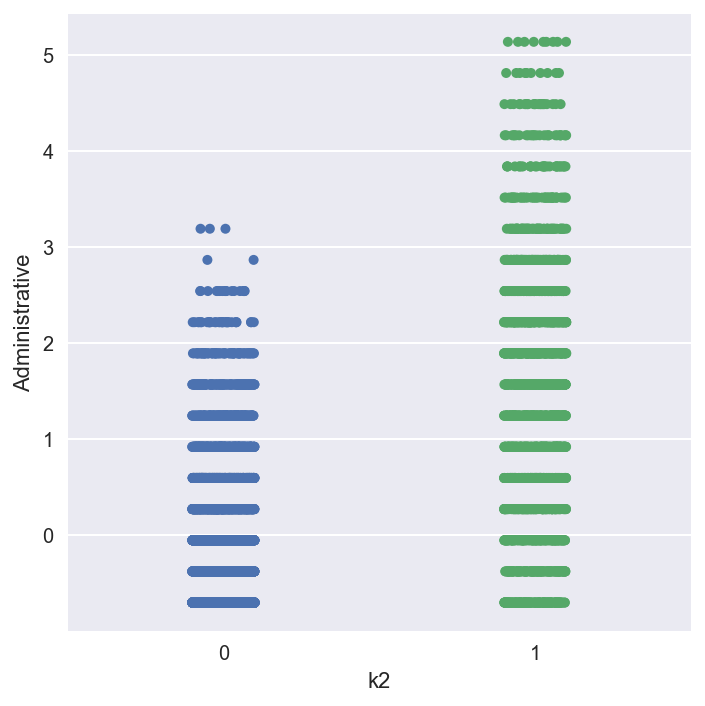

In [64]:
sns.catplot(x="k2", y="Administrative", data=k_means_2_df)

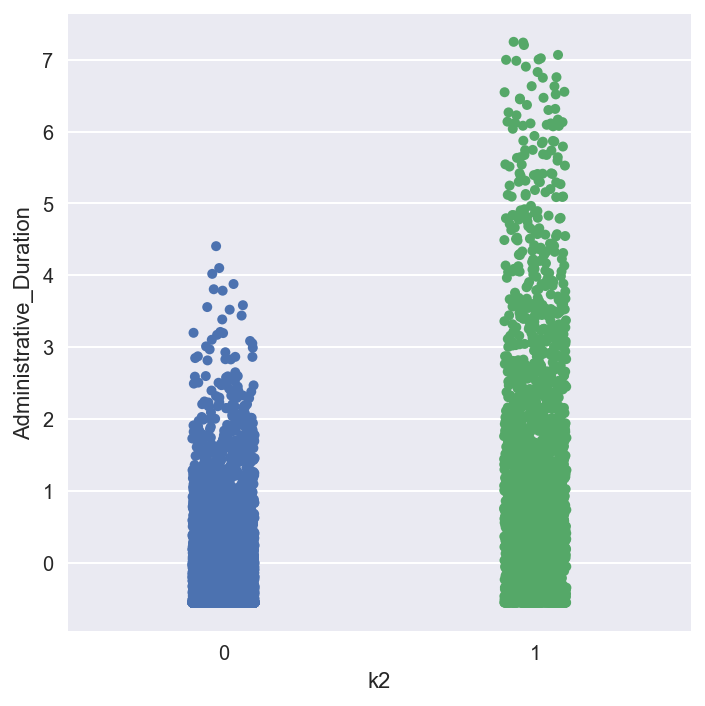

In [65]:
sns.catplot(x="k2", y="Administrative_Duration", data=k_means_2_df)

Customers labeled = 1 have more number of visits and more duration on Administrative Page than Customers labeled = 0.

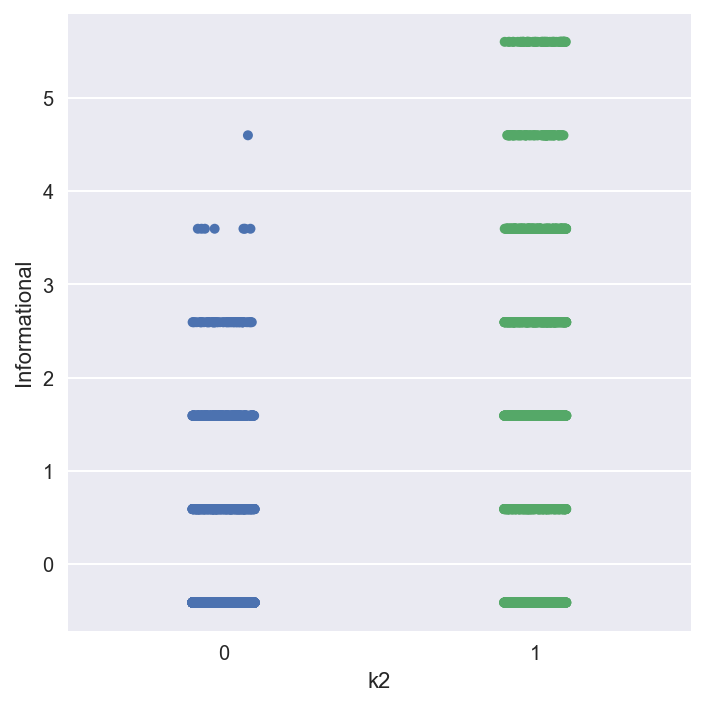

In [66]:
sns.catplot(x="k2", y="Informational", data=k_means_2_df)

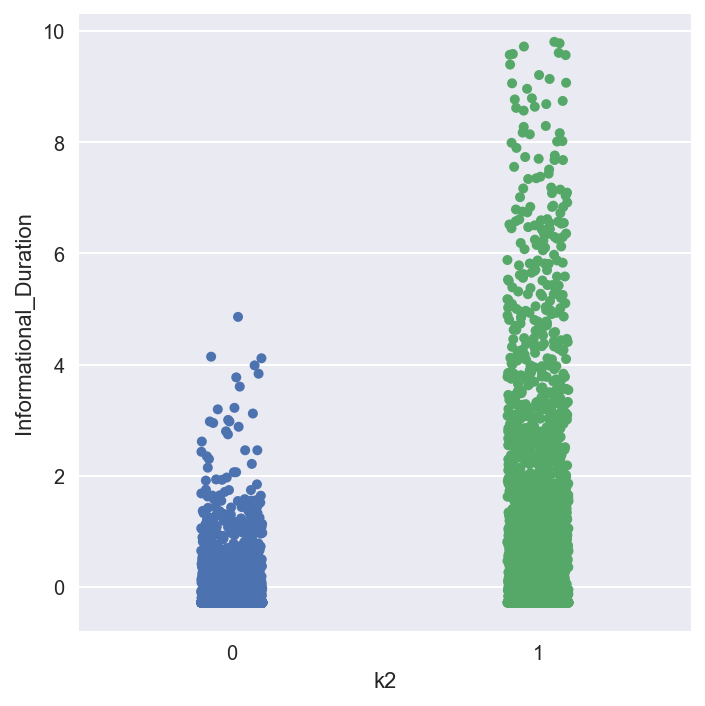

In [67]:
sns.catplot(x="k2", y="Informational_Duration", data=k_means_2_df)

Customers labeled = 1 have more number of visits and more duration on Informational Page than Customers labeled = 0.

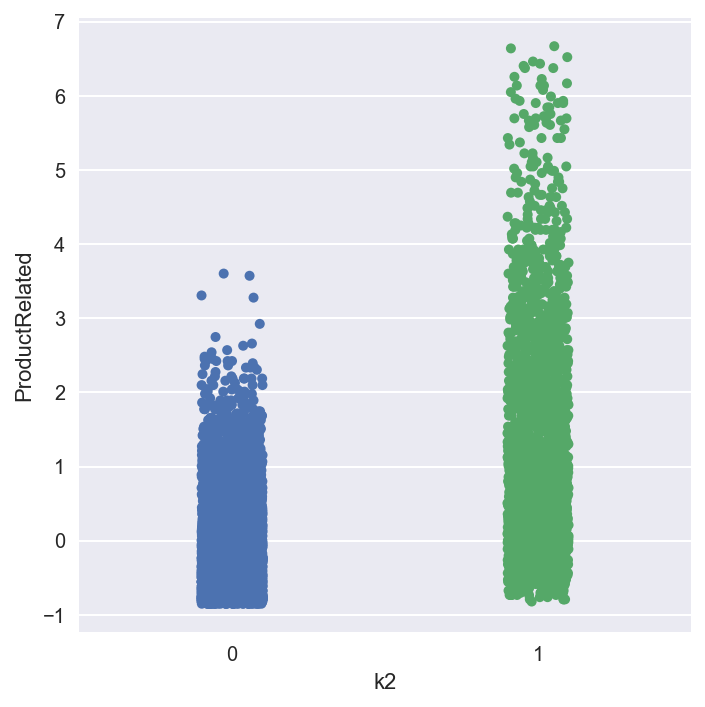

In [68]:
sns.catplot(x="k2", y="ProductRelated", data=k_means_2_df)

In [69]:
(
    prepared_df_copy.assign(cluster=k2.labels_)
    .groupby("cluster")
    .ProductRelated.describe()
    .T
)

cluster,0,1
count,9622.000000,2152.000000
mean,-0.281080,1.256763
std,0.547144,1.483618
min,-0.849525,-0.820041
25%,-0.672618,0.123468
50%,-0.436740,0.890069
75%,-0.082925,2.039970
max,3.602656,6.669059


Customers labeled = 1 visit more ProductRelated Page than Customers labeled = 0.

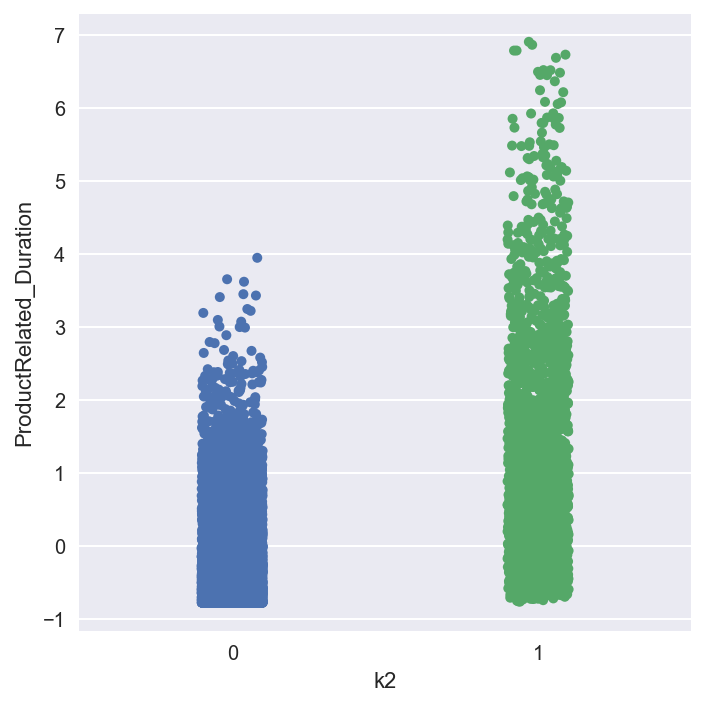

In [70]:
sns.catplot(x="k2", y="ProductRelated_Duration", data=k_means_2_df)

In [71]:
(
    prepared_df_copy.assign(cluster=k2.labels_)
    .groupby("cluster")
    .ProductRelated_Duration.describe()
    .T
)

cluster,0,1
count,9622.000000,2152.000000
mean,-0.269158,1.203457
std,0.576231,1.488462
min,-0.773538,-0.761193
25%,-0.674382,0.102150
50%,-0.463755,0.791554
75%,-0.075334,1.960661
max,3.950618,6.909882


Customers labeled = 1 have more duration on ProductRelated Page than Customers labeled = 0.

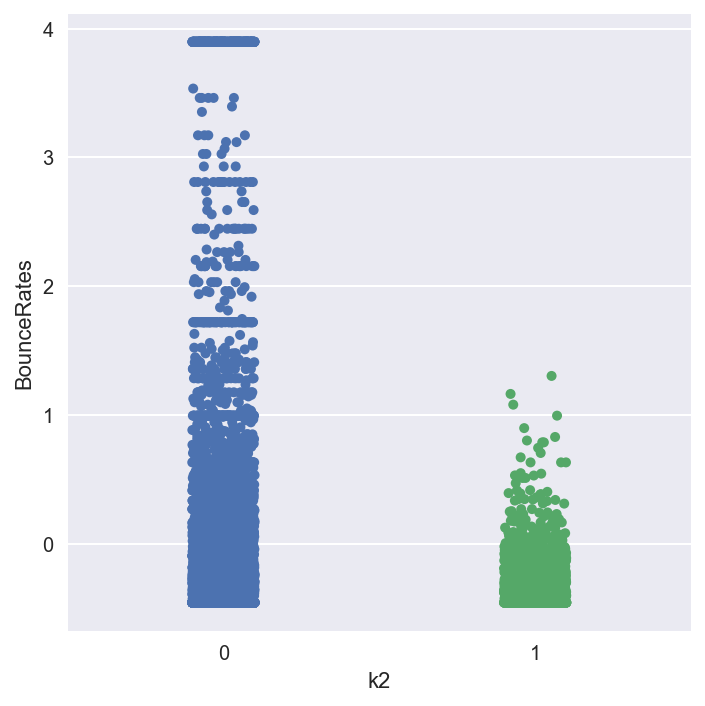

In [72]:
sns.catplot(x="k2", y="BounceRates", data=k_means_2_df)

In [73]:
(
    prepared_df_copy.assign(cluster=k2.labels_)
    .groupby("cluster")
    .BounceRates.describe()
    .T
)

cluster,0,1
count,9622.000000,2152.000000
mean,0.069967,-0.312838
std,1.090436,0.188511
min,-0.454699,-0.454699
25%,-0.454699,-0.454699
50%,-0.436492,-0.370307
75%,-0.004548,-0.254631
max,3.896765,1.304114


Customers labeled = 1 have lower mean and std of BounceRates than Customers labeled = 0

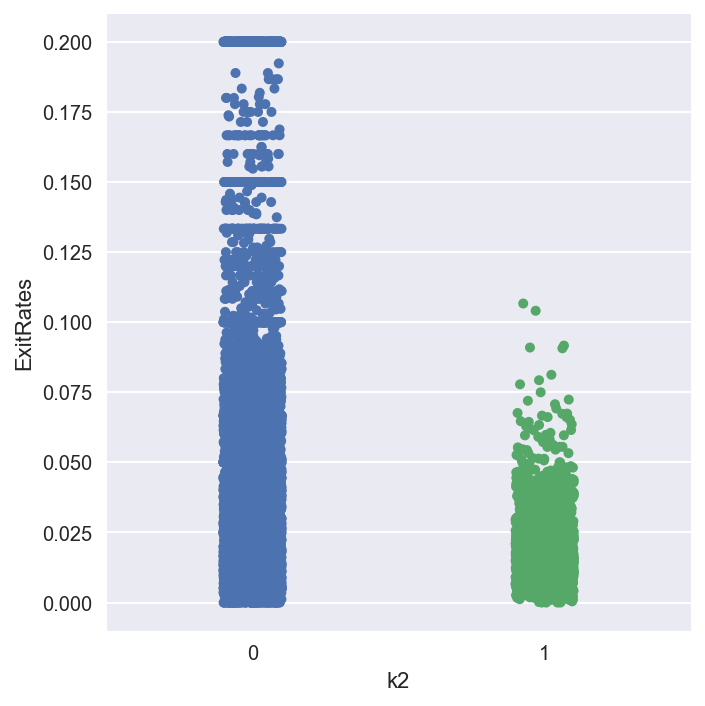

In [74]:
sns.catplot(x="k2", y="ExitRates", data=k_means_2_df)

In [75]:
(
    prepared_df_copy.assign(cluster=k2.labels_)
    .groupby("cluster")
    .ExitRates.describe()
    .T
)

cluster,0,1
count,9622.000000,2152.000000
mean,0.047319,0.019687
std,0.049962,0.012676
min,0.000000,0.000000
25%,0.015556,0.010966
50%,0.029327,0.017503
75%,0.056000,0.025518
max,0.200000,0.106667


Customers labeled = 1 have lower mean and std of ExitRates than Customers labeled = 0

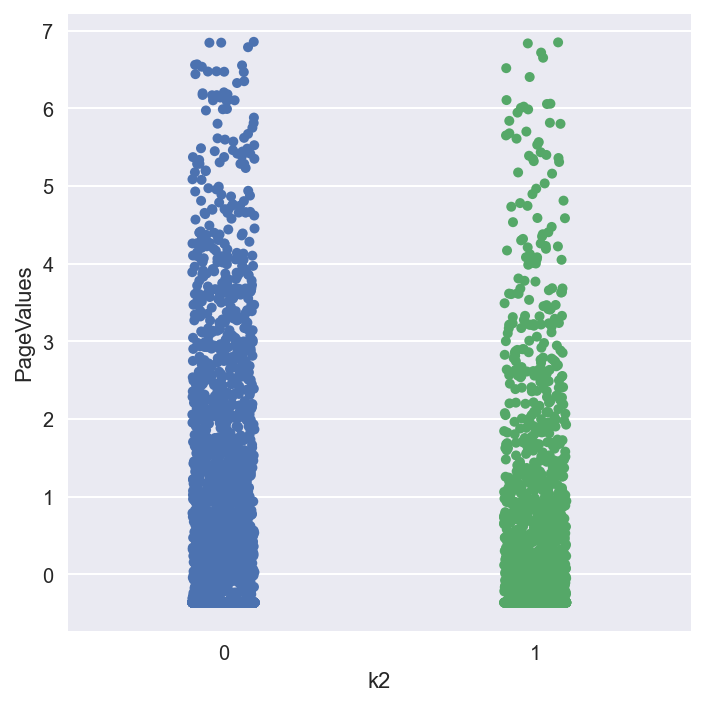

In [76]:
sns.catplot(x="k2", y="PageValues", data=k_means_2_df)

Customers labeled = 1 and Customers labeled = 0 have similar PageValues

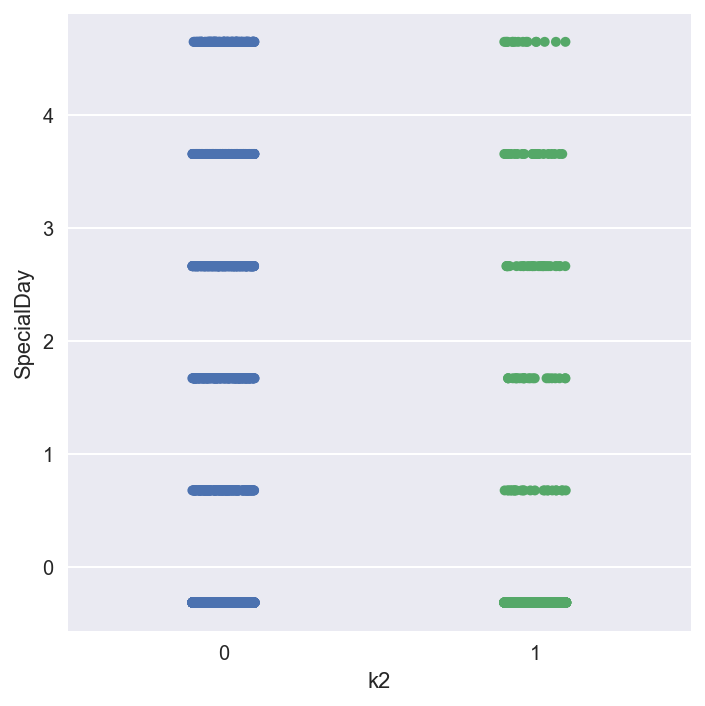

In [77]:
sns.catplot(x="k2", y="SpecialDay", data=k_means_2_df)

Customers labeled = 1 and Customers labeled = 0 have similar SpecialDay rate.

<AxesSubplot:>

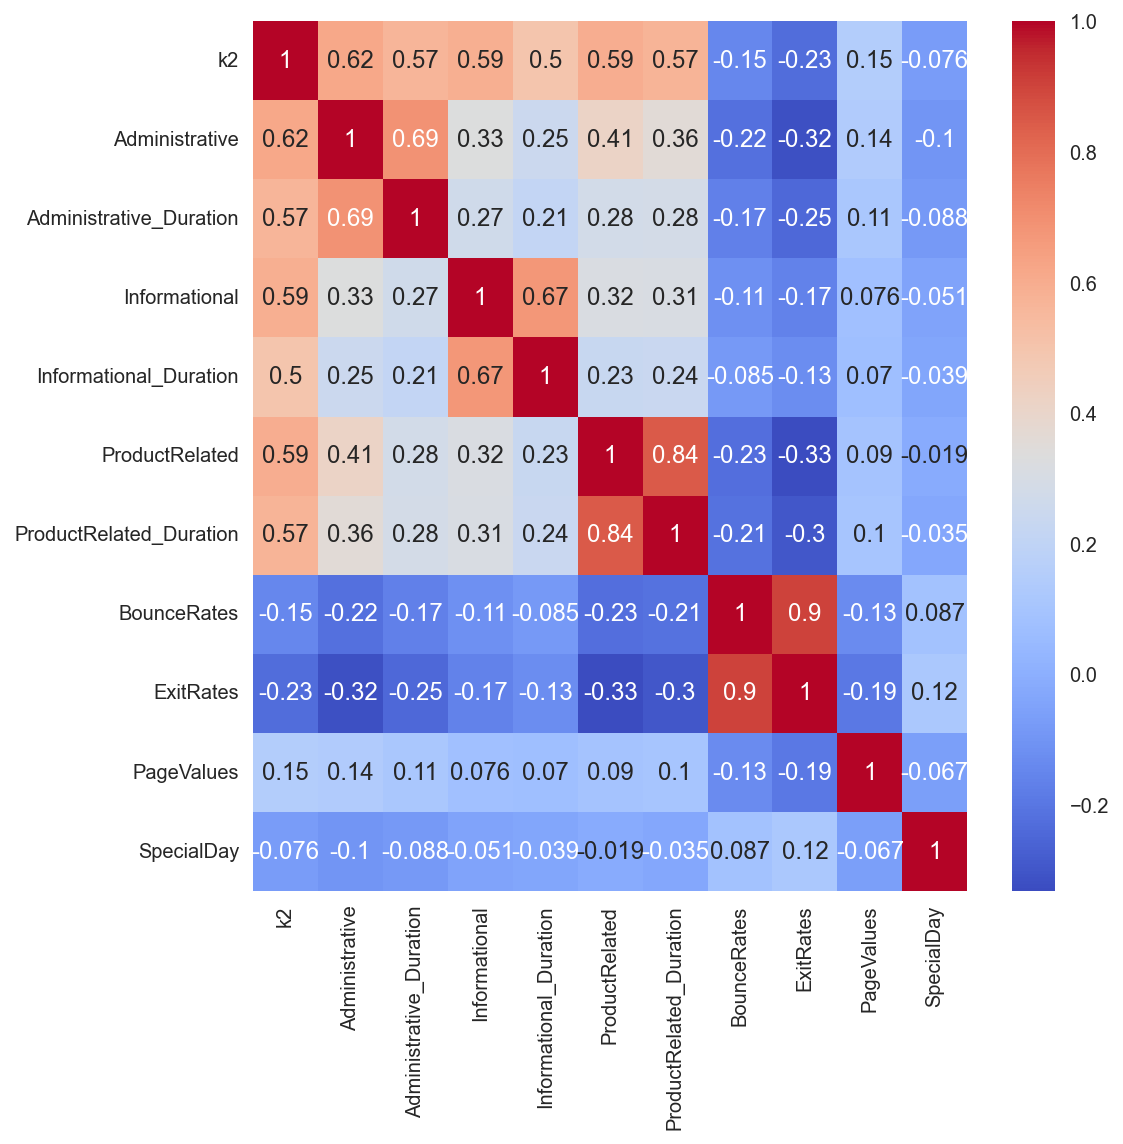

In [119]:
# use heatmap to show the correlation
cm = k_means_2_df[["k2"] + num_cols].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm')

The predicted clusters (k2) has over 0.5 correlations with 'Administrative', 'Administrative_Duration',  'Informational', 'ProductRelated_Duration' and 'ProductRelated'.         

<AxesSubplot:>

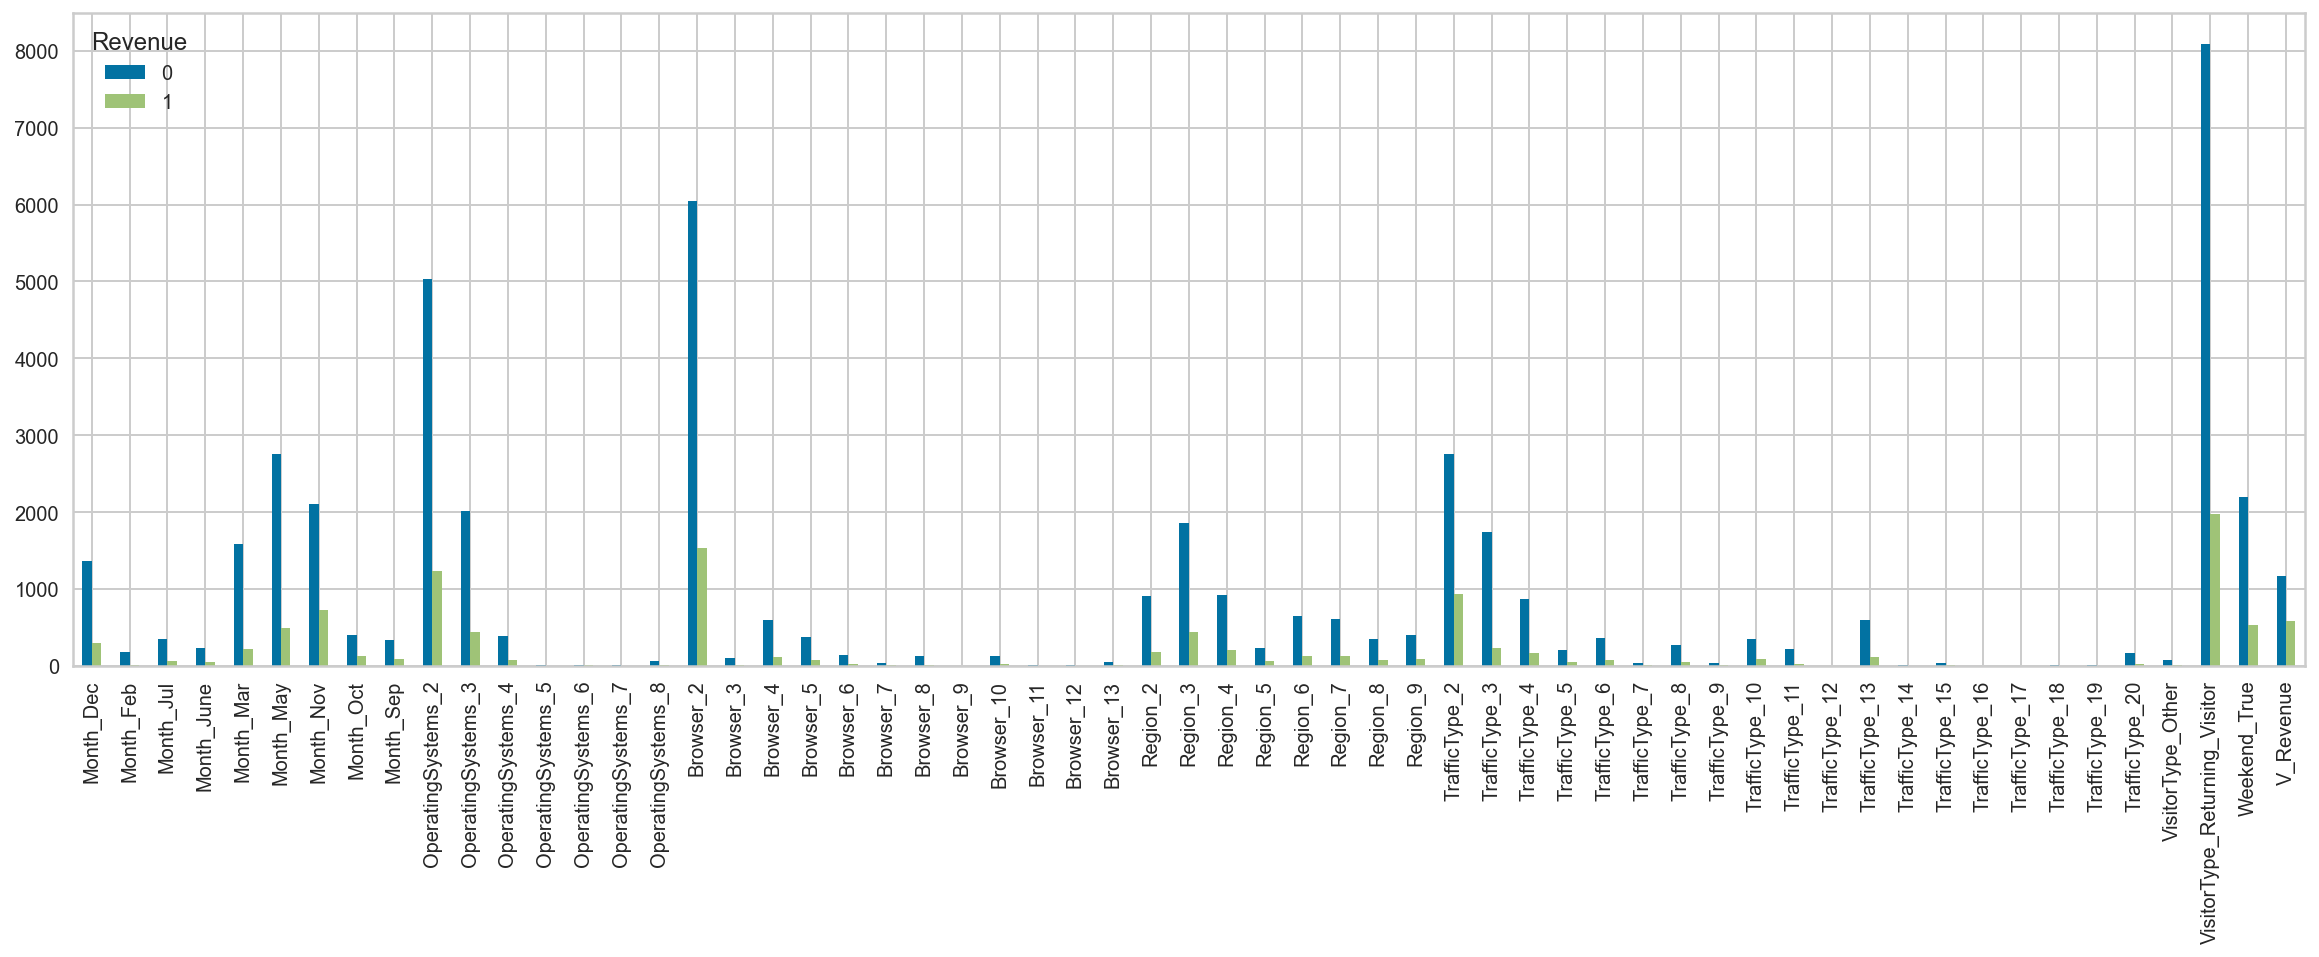

In [142]:
fig, ax = plt.subplots(figsize=(20, 6))
(
    act_pred_df.iloc[:,10:].assign(Revenue=k_means_2_df['k2'])
    .groupby("Revenue")
    .sum()
    .T.plot.bar(ax=ax)
)

The customers labeled 1 like shopping on Month_Nov and Weekend, using OperationSystems_2 and Browser_2, and using TrafficType_2. Also the customers labeled 1 are more likely to be Returning_Visitor.

### Summary

The customers labeled 1 spent more time and visited more pages on ProductRelated, Administrative and Informational links. 

The customers labeled 1 have lower mean and std of BounceRates and ExitRates than Customers labeled 0.

There is no obvious difference between 2 groups of customer in terms of PageValues and SpecialDay rate.

There are 5 variables have over 0.5 correlation with the predicted result.

The customers labeled 1 like shopping on Month_Nov and Weekend, using OperationSystems_2 and Browser_2, and using TrafficType_2. Also the customers labeled 1 are more likely to be Returning_Visitor.

# 7. Clustering Output vs. Actual Labels

Add a new column to your Pandas dataframe with the name Revenue. Within this new column, insert the grouping assignments identified by your K-means clustering for each observation within the data set.

In [78]:
# Read the data from GitHub and create a data frame
actual_revenue_df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/Project2_Data_Labels.csv')
actual_revenue_df.head(3)

,Revenue
0,True
1,False
2,False


In [79]:
# combine my k-mean result with actual_revenue
act_pred_df = pd.concat([k_means_2_df, actual_revenue_df], join = "inner", axis=1)
act_pred_df[87:93]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,k2,Revenue
90,2.539646,0.401785,-0.412167,-0.286223,1.656669,1.183443,-0.454699,0.001916,-0.362453,-0.313899,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False
91,-0.057123,-0.357462,-0.412167,-0.286223,-0.377771,-0.450139,-0.358000,0.022222,-0.362453,-0.313899,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
93,-0.706315,-0.551313,-0.412167,-0.286223,-0.407256,-0.182414,0.214757,0.053846,-0.362453,-0.313899,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
94,-0.706315,-0.551313,-0.412167,-0.286223,-0.761071,-0.753931,0.995789,0.133333,-0.362453,-0.313899,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,False
95,-0.706315,-0.551313,-0.412167,-0.286223,0.093983,-0.048067,-0.454699,0.013441,0.303632,-0.313899,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True
96,-0.706315,-0.551313,-0.412167,-0.286223,-0.495710,-0.375461,-0.092077,0.071667,-0.362453,-0.313899,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False


In [80]:
# rename columns
act_pred_df.rename(columns={"k2":"Revenue", "Revenue":"V_Revenue"}, inplace=True)

In [81]:
# convert (False, True) to (0, 1)
act_pred_df["V_Revenue"] = act_pred_df["V_Revenue"].map({False: 0, True: 1})

In [82]:
# check the combined columns
act_pred_df[['Revenue', 'V_Revenue']][87:92]

,Revenue,V_Revenue
90,1,0
91,0,0
93,0,0
94,0,0
95,0,1


In [84]:
# Using confusion_matrix to check
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(act_pred_df['Revenue'], act_pred_df['V_Revenue']),
    columns = ["Predict 0", "Predict 1"],
    index = ["True 0", "True 1"]
)

,Predict 0,Predict 1
True 0,8459,1163
True 1,1571,581


In [85]:
# check the classification report
from sklearn.metrics import classification_report
print(classification_report(act_pred_df['V_Revenue'], act_pred_df['Revenue'], target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.84      0.86     10030
     class 1       0.27      0.33      0.30      1744

    accuracy                           0.77     11774
   macro avg       0.57      0.59      0.58     11774
weighted avg       0.79      0.77      0.78     11774



The recall and precision are very low. The accuracy is 0.77 but the baseline is null error rate = 84.5%. My K-mean model is not a good model that can not group clusters accurately.

# 8. SVM Modeling
- Split train and test sets
- Feature Selection for SVM
- 2 SVM Models

### Split train and test sets

In [86]:
revenue_Vrevenue_df = act_pred_df[['Revenue','V_Revenue']].copy()

In [87]:
# Split train and test sets. Because act_pred_df is a standardization and dummy set, I will split it directly.

# copy the Revenue and V_Revenue
revenue_Vrevenue_df = act_pred_df[['Revenue','V_Revenue']].copy()

y = act_pred_df['Revenue']
X = act_pred_df.drop(columns=['Revenue','V_Revenue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
# check 
X_train.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
8644,0.916666,0.501402,0.590281,0.641702,0.831099,1.158325,-0.436261,0.003955,3.987663,-0.313899,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1091,0.592070,0.250676,-0.412167,-0.286223,0.890069,2.276925,-0.079573,0.021690,-0.136083,3.654792,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8363,-0.706315,-0.551313,-0.412167,-0.286223,-0.790556,-0.706002,-0.454699,0.050000,-0.362453,-0.313899,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Feature Selection for SVM

#### Features of Model 1
I will select high correlation features for Model 1 

From the previous EDA, I found that ('Administrative', 'Administrative_Duration'), ('Informational', 'Informational_Duration'), ('ProductRelated', 'ProductRelated_Duration') have over 0.6 correlation. 'BounceRates' and 'ExitRates' have 0.91 correlation.

Next, check the correlation between Response(V_Revenue) and Numerical variables.

In [89]:
# use heatmap to show the correlation
cm = act_pred_df[['Revenue'] + num_cols].corr()
cm['Revenue'].sort_values(ascending = False)

Revenue                    1.000000
Administrative             0.619974
ProductRelated             0.594350
Informational              0.591317
ProductRelated_Duration    0.569140
Administrative_Duration    0.567350
Informational_Duration     0.497735
PageValues                 0.147151
SpecialDay                -0.076496
BounceRates               -0.147948
ExitRates                 -0.228559
Name: Revenue, dtype: float64

I will select features that correlation is larger than 0.5

In [90]:
features_model_1 = [ 'ProductRelated_Duration', 'ProductRelated', 'Administrative', 
                   'Administrative_Duration', 'Informational']

#### Features for Model 2

AdaBoostClassifier

In [91]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train, y_train)

model_ada = SelectFromModel(ada, prefit=True)

mask = model_ada.get_support()
features_model_2 = X_train.columns[mask]

print("The size of features : %d " %len(features_model_2))
print(features_model_2)

The size of features : 9 
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'SpecialDay', 'TrafficType_2'],
      dtype='object')


### 2 SVM Models

- svm model 1 with linear kernel
  - Using cross validation to find the C for linearSVC

- svm model 2 with RBF kernel
  - Using grid search and cross validation to find the best C and gamma for RBF
  - C: The bigger, the less support vectors, overfitting.
  - gamma: The bigger, the less support vectors, overfitting.

In [92]:
def my_confusion_matrix(actuals, predicts):
    
    actuals_category = pd.Categorical(actuals, categories=[0, 1])
    
    predicts_category = pd.Categorical(predicts, categories=[0, 1])
    
    
    cor = pd.crosstab(actuals_category, predicts_category, dropna=False, 
                     rownames = ['actual'], 
                     colnames = ['predict'])
    
    #print(cor)
    tp = cor.loc[1, 1]
    fp = cor.loc[0, 1]
    tn = cor.loc[0, 0]
    fn = cor.loc[1, 0]
    #print("tp = %d, fp = %d, tn = %d, fn = %d" %(tp,fp,tn,fn))
    
    result_map = {"tp":tp, "fp":fp, "tn":tn, "fn":fn}
    
    # print(result_map)
    return result_map

# specificity = tn / (tn + fp)
def my_specificity(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    result = (cor_map['tn']) / (cor_map['tn'] + cor_map['fp'])
    
    #print("specificity = %.4f" %result)
    
    return result

In [93]:
# https://machinelearningmastery.com/probabilistic-model-selection-measures/
from math import log
from sklearn.metrics import mean_squared_error
 
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

# use cross validation to fit train set
def my_cls_cv(model_name, model_, X_df, y_df, cv = 5, len_num_params = 0):
    
    auc_arr = []
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_arr = []
    specificity_arr = []
    classErrR_arr = [] # classfication error rate = 1 - accuracy
    aic_arr = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    for train_idx, test_idx in kf.split(X_df):

        X_train_, X_test_ = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_, y_test_ = y_df.iloc[train_idx], y_df.iloc[test_idx]

        #Train the model
        model_.fit(X_train_, y_train_) #Training the model
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test_, model_.predict(X_test_))
        auc_ = metrics.auc(fpr, tpr)
        auc_arr.append(auc_)
        
        accuracy = accuracy_score(y_test_, model_.predict(X_test_))
        accuracy_arr.append(accuracy)
        
        precision = precision_score(y_test_, model_.predict(X_test_))
        precision_arr.append(precision)
        
        recall = metrics.recall_score(y_test_, model_.predict(X_test_))
        recall_arr.append(recall)
        
        f1 = metrics.f1_score(y_test_, model_.predict(X_test_))
        f1_arr.append(f1)
        
        specificity = my_specificity(y_test_, model_.predict(X_test_))
        specificity_arr.append(specificity)
        
        classErrR_arr.append(1 - accuracy)
        
        # calculate the error
        mse = mean_squared_error(y_test_, model_.predict(X_test_))
        aic = calculate_aic(len(y_test_), mse, len_num_params)
        aic_arr.append(aic)
        
    #print(f"On the KFold = %d test set: Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. auc = %.4f" %(cv, np.mean(accuracy_arr), np.mean(precision_arr), np.mean(roc_arr)))
    
    rst_dic = {"Features":len_num_params, "Avg_accuracy":np.mean(accuracy_arr), "Avg_precision": np.mean(precision_arr), 
               "Avg_auc" : np.mean(auc_arr), "Avg_recall": np.mean(recall_arr), "Avg_f1": np.mean(f1_arr), 
               "Avg_specificity": np.mean(specificity_arr), "Avg_classErrR": np.mean(classErrR_arr), "Avg_AIC": np.mean(aic_arr)}
    
    return rst_dic

    # return np.mean(accuracy_arr), np.mean(precision_arr), np.mean(auc_arr), np.mean(recall_arr)

def svm_rbf_cv(x, y):
    model_ = SVC(kernel='rbf', probability=True)
    
    param_map = {'C':[0.0001, 0.001, 0.1, 10, 100], 'gamma' : [100, 10, 0.1, 0.001, 0.0001]}
    grid_search = GridSearchCV(model_, param_map, verbose=1, n_jobs= 8)
    grid_search.fit(x, y)
    best_parameters = grid_search.best_estimator_.get_params()
    
    for para, val in list(best_parameters.items()):
        print(para, val)
    
    new_model_ = SVC(kernel='rbf', C = best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    new_model_.fit(x, y)
    
    return new_model_

from sklearn.svm import LinearSVC
def svm_linear_cv(features_name) :
    c_arr = [0.1, 1, 10]

    
    avg_accs = []
    avg_pres = []
    avg_aucs = []
    avg_recalls = []
    avg_f1_arr = []
    avg_specificity_arr = []
    avg_classErrR_arr = [] # classfication error rate = 1 - accuracy
    avg_aic_arr = []

    dic = {"c" : c_arr, 
           "Avg_accuracy" : avg_accs, 
           "Avg_precision" : avg_pres, 
           "Avg_auc" : avg_aucs, 
           "Avg_recall" : avg_recalls,
           "Avg_f1":avg_f1_arr,
           "Avg_specificity":avg_specificity_arr,
           "Avg_classErrR":avg_classErrR_arr,
           "Avg_aic":avg_aic_arr
          }
    for c in c_arr:
        knc = LinearSVC(C=c, max_iter=10000)
        one_dic = my_cls_cv("svm_linearSVC_model_2", knc, X_train[features_name], y_train)
        avg_accs.append(one_dic['Avg_accuracy'])
        avg_pres.append(one_dic['Avg_precision'])
        avg_aucs.append(one_dic['Avg_auc'])
        avg_recalls.append(one_dic['Avg_recall'])
        avg_f1_arr.append(one_dic['Avg_f1'])
        avg_specificity_arr.append(one_dic['Avg_specificity'])
        avg_classErrR_arr.append(one_dic['Avg_classErrR'])
        avg_aic_arr.append(one_dic['Avg_AIC'])
        
    knn_1_res_df = pd.DataFrame(dic)
    
    return knn_1_res_df

def draw_svm_multi_lines(knn_1_res_df):
    f, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(data=knn_1_res_df.iloc[:,1:], ax = ax)

    ax.set_xticks(range(len(knn_1_res_df)))
    ax.set_xticklabels(knn_1_res_df["c"])
    plt.show()
    
def run_cv_4_models(model_name, model_, X_df, y_df, cv = 5):
    one_dic = my_cls_cv(model_name, model_, X_df, y_df)
    
    print(one_dic)
    return one_dic

### svm model 1 with linear kernel

In [95]:
# check the features
features_model_1

['ProductRelated_Duration',
 'ProductRelated',
 'Administrative',
 'Administrative_Duration',
 'Informational']

In [96]:
# Using cross validation to find out the best C for LinearSVC
svm_linear_rs_df = svm_linear_cv(features_model_1)

In [97]:
# print result of cross validation
svm_linear_rs_df

,c,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_aic
0,0.1,0.980463,0.962585,0.960159,0.928495,0.944959,0.991822,0.019537,-6534.334015
1,1.0,0.980342,0.961052,0.960375,0.929220,0.944659,0.991531,0.019658,-6525.303313
2,10.0,0.980221,0.960286,0.960302,0.929220,0.944308,0.991385,0.019779,-6516.513459


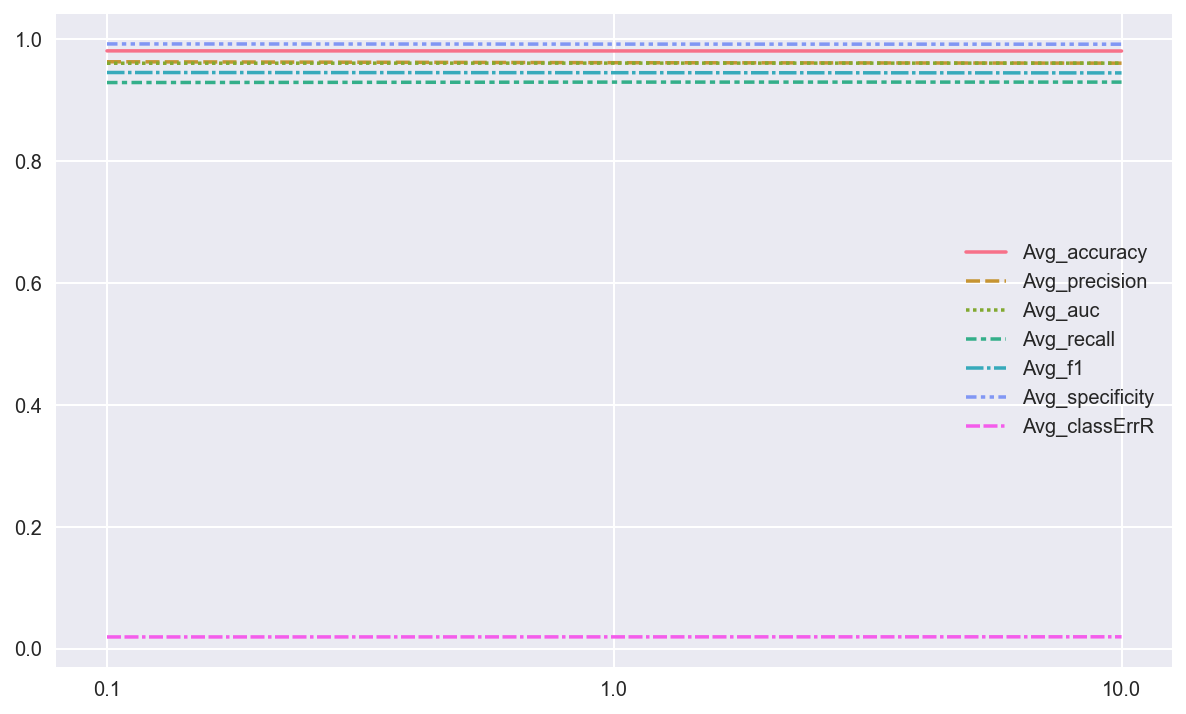

In [98]:
# draw line plot to see recall by different C
draw_svm_multi_lines(svm_linear_rs_df.drop(columns=['Avg_aic']))

### svm model 2 with RBF kernel

In [99]:
# check the features
features_model_2

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'SpecialDay', 'TrafficType_2'],
      dtype='object')

In [100]:
# using grid search and cross validation to find out the best C and gamma
svm_rbf_model_1 = svm_rbf_cv(X_train[features_model_2], y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
C 100
break_ties False
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma 0.001
kernel rbf
max_iter -1
probability True
random_state None
shrinking True
tol 0.001
verbose False


The above result of GridSearch shows the best C = 100 and gamma = 0.001. I use the best C and gamma to create the SVM model named svm_rbf_model_1

In [101]:
# Calculate the metrics for svm_rbf_model_1
result_model_2 = run_cv_4_models("svm_rbf_model_1", svm_rbf_model_1, X_train[features_model_2], y_train)

{'Features': 0, 'Avg_accuracy': 0.9967235953534652, 'Avg_precision': 0.9958651216918023, 'Avg_auc': 0.9923948550879489, 'Avg_recall': 0.9856760978359984, 'Avg_f1': 0.9907414194515753, 'Avg_specificity': 0.9991136123398997, 'Avg_classErrR': 0.003276404646534825, 'Avg_AIC': -9511.140070649159}


### 9. Select Models

In [103]:
# print the svm linear result
print(len(features_model_1))
svm_linear_rs_df

5


,c,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_aic
0,0.1,0.980463,0.962585,0.960159,0.928495,0.944959,0.991822,0.019537,-6534.334015
1,1.0,0.980342,0.961052,0.960375,0.929220,0.944659,0.991531,0.019658,-6525.303313
2,10.0,0.980221,0.960286,0.960302,0.929220,0.944308,0.991385,0.019779,-6516.513459


In [104]:
# print the svm rbf kernel result
result_model_2['Features'] = len(features_model_2)
svm_rbf_rs_df = pd.DataFrame(result_model_2, index=[0])
svm_rbf_rs_df

,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,9,0.996724,0.995865,0.992395,0.985676,0.990741,0.999114,0.003276,-9511.140071


The followed table can compare the two models


| Metric        | Model 1 SVM Linear | Model 2 SVM rbf
| ------------- | ------- | ------- 
| # Indep. Vars |  5      |   9      
| AIC           | -6516.513459  | -9511.140071  
| Accuracy      | 0.980221	  | 0.996724  
| Class.Err.R.  | 0.019779  | 0.003276  
| Precision     | 0.960286  | 0.995865  
| Sensitivity(Recall)   | 0.929220  | 0.985676 
| Specificity   | 0.991385| 0.999114		   
| F1 Score      | 0.944308  | 0.990741  
| AUC           | 0.960302  | 0.992395  

The Model 2 SVM rbf is higher than Model 1 SVM Linear in metrics Accuracy, Sensitivity(Recall), F1 and AUC. I prefer to select **Model 2 SVM rbf** for further study.

### Using test set to test

In [105]:
# predict the test set
y_predict = svm_rbf_model_1.predict(X_test[features_model_2])

### Evaluate the model with imbalanced test set

In [106]:
test_predictions = svm_rbf_model_1.predict(X_test[features_model_2])

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2869
           1       1.00      0.98      0.99       664

    accuracy                           1.00      3533
   macro avg       1.00      0.99      0.99      3533
weighted avg       1.00      1.00      1.00      3533



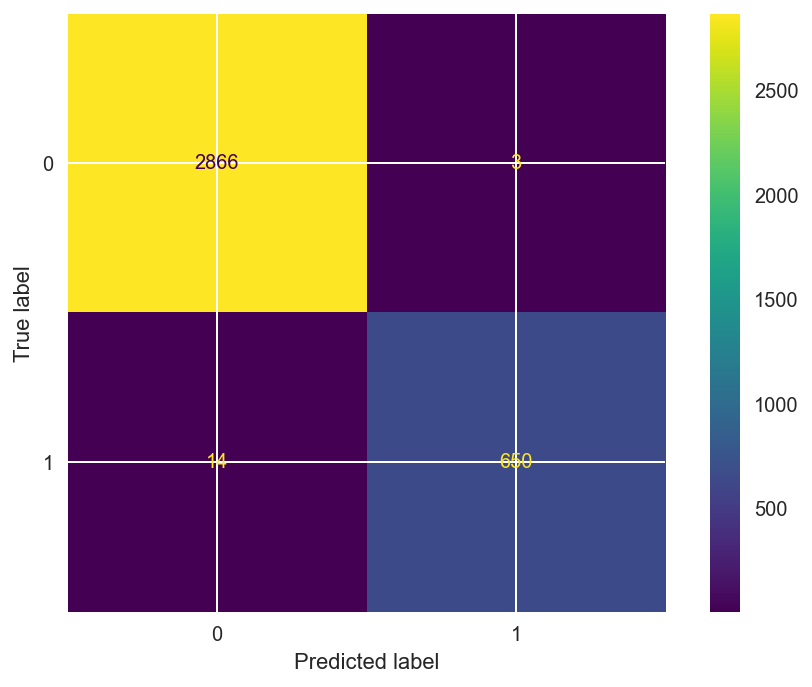

In [107]:
plot_confusion_matrix(svm_rbf_model_1, X_test[features_model_2], y_test)

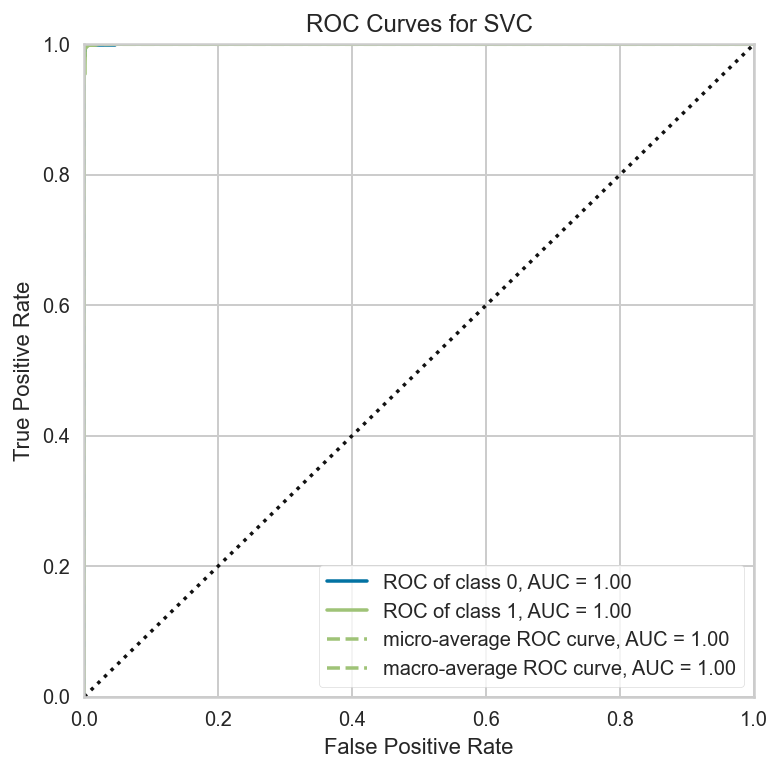

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [108]:
# draw a ROC curve.
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(svm_rbf_model_1)
roc_viz.fit(X_test[features_model_2], y_test)
roc_viz.score(X_test[features_model_2], y_test)
roc_viz.poof()

The model on the test set has:

accuracy = 1

recall = 0.98

precision = 1

AUC = 1.0

#### Summary

The SVM with rbf kernel can 100% accuracy predict the Revenue with the test set. Why SVM can 100% accuracy predict the result of K-Means? Because both models use the Euclidean distance to judge two observations whether are close or not.

# 10. Clustering + SVM Output vs. Actual Labels 

Compare the predicted values for the Revenue attribute from the testing data set to the corresponding values of the V_Revenue variable. How well does the SVM model derived from the results of your clustering work match up to the actual V_Revenue classifications?

In [109]:
#create NumPy array for 'k2_col'
test_predictions_arr = np.array(test_predictions)

y_test_df = pd.DataFrame(y_test)
#add 'k2_col' array as new column in DataFrame
y_test_df['test_predictions'] = test_predictions_arr.tolist()

In [110]:
# check
y_test_df.head(3)

,Revenue,test_predictions
12225,0,0
10471,0,0
213,0,0


In [123]:
# We have the whole set of Revenue (predicted by K-Means) and V_Revenue. Let's check it
revenue_Vrevenue_df.head(3)

,Cluster_Revenue,V_Revenue
0,0,1
1,0,0
2,0,0


In [111]:
# rename the column from Revenue to Cluster_Revenue predicted by K-Means
revenue_Vrevenue_df.rename(columns={"Revenue":"Cluster_Revenue"}, inplace=True)

In [112]:
# combine the SVM Predictions, K-means Preditions and Actual Revenue
cluster_SVM_act_pred_df = pd.concat([y_test_df, revenue_Vrevenue_df], join = "inner", axis=1)
cluster_SVM_act_pred_df = cluster_SVM_act_pred_df.drop(columns=['Revenue'])
cluster_SVM_act_pred_df.rename(columns={"test_predictions":"SVM_test_predictions"}, inplace=True)
cluster_SVM_act_pred_df.head(3)

,SVM_test_predictions,Cluster_Revenue,V_Revenue
12225,0,0,0
10471,0,0,0
213,0,0,0


#### Compare SVM predictions with V_Revenue

In [113]:
# Using confusion_matrix to check
pd.DataFrame(
    confusion_matrix(cluster_SVM_act_pred_df['SVM_test_predictions'], cluster_SVM_act_pred_df['V_Revenue']),
    columns = ["Predict 0", "Predict 1"],
    index = ["True 0", "True 1"]
)

,Predict 0,Predict 1
True 0,2510,370
True 1,496,157


In [114]:
print(classification_report(cluster_SVM_act_pred_df['V_Revenue'], cluster_SVM_act_pred_df['SVM_test_predictions'], target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.87      0.83      0.85      3006
     class 1       0.24      0.30      0.27       527

    accuracy                           0.75      3533
   macro avg       0.56      0.57      0.56      3533
weighted avg       0.78      0.75      0.77      3533



#### Compare K-means predictions with V_Revenue

In [115]:
pd.DataFrame(
    confusion_matrix(cluster_SVM_act_pred_df['Cluster_Revenue'], cluster_SVM_act_pred_df['V_Revenue']),
    columns = ["Predict 0", "Predict 1"],
    index = ["True 0", "True 1"]
)

,Predict 0,Predict 1
True 0,2501,368
True 1,505,159


In [116]:
print(classification_report(cluster_SVM_act_pred_df['V_Revenue'], cluster_SVM_act_pred_df['Cluster_Revenue'], target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.87      0.83      0.85      3006
     class 1       0.24      0.30      0.27       527

    accuracy                           0.75      3533
   macro avg       0.56      0.57      0.56      3533
weighted avg       0.78      0.75      0.76      3533



#### Summary

SVM predictions vs V_Revenue and K-Means predictions vs V_Revenue have similar performance.

The SVM predictions can 100% accuracy predict the result of K-Means, because both models use the Euclidean distance to judge two observations whether are close or not.

# 11. Conclustions

Hierarchical
- hierarchical can group unlabeled data.
- dendrogram can find out clusters easily. The tallest branches indicate the best clusters.

K-means
- Inertia plot: elbow on the Inertia plot indicate the best number of cluster
- silhouette plot: the highest silhouette indicate the best number of cluster

Predictions of K-means
- I used standardized data and original data to group the clusters. The standardized data have better performance than original data for this data set.
- The result of K-means compare Actual Revenue: I got a very low Accuracy, recall and other metrices.
- Unsupervised models are not easy to get good performance predictions without domain knowledge.

Using SVM to predict the result of K-means
- I got almost 100% accuracy, 100% recall and 100% AUC. Because SVM and K-means all use distances to judge the relations among observations, the SVM can get 100% accuracy on result of K-means

# 12. Reference

https://scikit-learn.org/

https://machinelearningmastery.com/probabilistic-model-selection-measures/